<a href="https://colab.research.google.com/github/shubhangiborse/BizcardX/blob/main/Guvi_Neural_Network_crash_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Using MLP

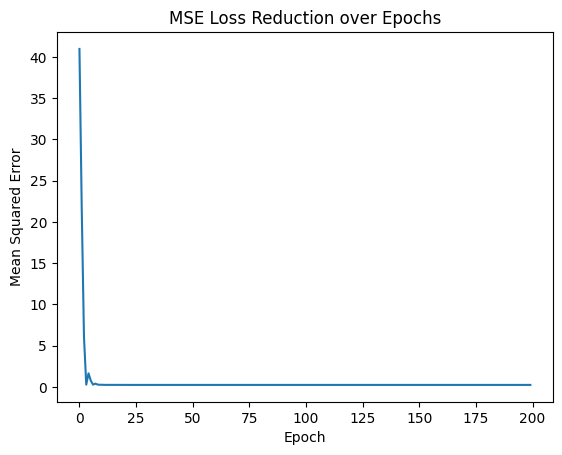

Final MSE Loss: 0.2521902042097871


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100) * 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train MLP
mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam',
                   max_iter=1, batch_size=10, learning_rate_init=0.01,
                   warm_start=True, random_state=1)

mse_list = []
for _ in range(200):
    mlp.partial_fit(X_train, y_train)
    y_pred = mlp.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mse_list.append(mse)

# Plot loss reduction
plt.plot(mse_list)
plt.title('MSE Loss Reduction over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

# Output final loss
final_loss = mse_list[-1]
print(f"Final MSE Loss: {final_loss}")


# Single-Layer Perceptron

A single-layer perceptron is one of the simplest types of artificial neural networks and can be considered the building block of neural networks. It consists of a single layer of output nodes; the inputs are fed directly to the outputs via a series of weights, and then an activation function is applied.

**Characteristics:**

1. It can only learn linearly separable patterns.
2. It uses a threshold-based activation function, originally a step function.
3. It's typically used for binary classification problems.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

    def activation_function(self, x):
        return np.where(x > 0, 1, 0)

# Create a simple dataset
X = np.array([[2, 3], [1, 1], [2, 1], [5, 4], [6, 5], [5, 5]])
y = np.array([0, 0, 0, 1, 1, 1])  # Labels

# Training the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iter=10)
perceptron.fit(X, y)

# Predicting new data
print(perceptron.predict([[2, 2], [3, 5], [5, 3]]))


[0 0 1]


#Multi-Layer Perceptron (MLP)

A multi-layer perceptron (MLP) is a class of feedforward artificial neural network (ANN) that has one or more layers of neurons with activation functions. MLP utilizes a supervised learning technique called backpropagation for training its layers.

**Characteristics:**

1. It can approximate virtually any input-output map and solve problems that are not linearly separable, unlike single-layer perceptrons.
2. Typically uses sigmoid, tanh, or ReLU activation functions instead of a step function.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9333333333333333


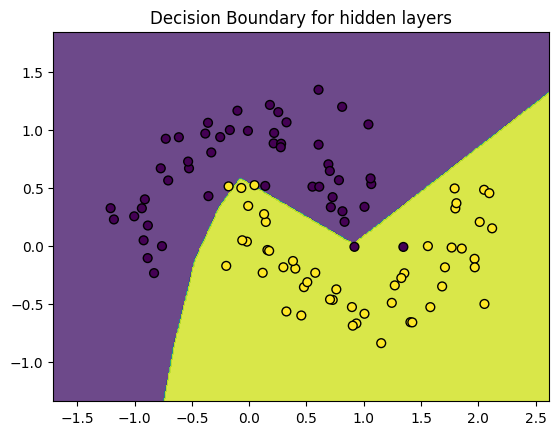

In [ ]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generating a dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building and training the MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plotting decision boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plot_decision_boundary(lambda x: mlp.predict(x))
plt.title("Decision Boundary for hidden layers")
plt.show()


#Neurons, activation functions, and layers


In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

# Simple neural network with one hidden layer
class SimpleNeuralNetwork:
    def __init__(self):
        # Weights and bias initialization
        self.w1 = np.random.randn()
        self.b1 = np.random.randn()
        self.w2 = np.random.randn()
        self.b2 = np.random.randn()

    def forward_pass(self, x):
        # First layer (hidden)
        z1 = self.w1 * x + self.b1
        a1 = sigmoid(z1)  # Activation function

        # Output layer
        z2 = self.w2 * a1 + self.b2
        output = relu(z2)  # Activation function
        return output

# Create a neural network and perform a forward pass
nn = SimpleNeuralNetwork()
input_feature = 0.5
output = nn.forward_pass(input_feature)
print(f"Output of the neural network for input {input_feature} is {output}")


Output of the neural network for input 0.5 is 0.0


#Hands-on with simple neural networks in PyTorch

PyTorch is a popular and powerful deep learning framework that provides maximum flexibility and speed during the building and training of neural network models. In this detailed explanation, we'll explore the construction and training of simple neural networks in PyTorch, covering a variety of examples and network configurations.

In [ ]:
# Setting Up PyTorch
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=3)  # Input layer to hidden layer
        self.relu = nn.ReLU()                                   # Non-linear activation function
        self.layer2 = nn.Linear(in_features=3, out_features=1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()                             # Output layer activation

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Initialize the network
net = SimpleNN()
print(net)

# Example input
input_features = torch.tensor([[1.0, 2.0]])
output = net(input_features)
print("Output of the network:", output)


SimpleNN(
  (layer1): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Output of the network: tensor([[0.3598]], grad_fn=<SigmoidBackward0>)


In [ ]:
# Dummy dataset
inputs = torch.randn(100, 2)
targets = torch.where((inputs[:, 0] + inputs[:, 1] > 0), 1.0, 0.0).view(-1, 1)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.7319
Epoch [11/100], Loss: 0.7296
Epoch [21/100], Loss: 0.7275
Epoch [31/100], Loss: 0.7254
Epoch [41/100], Loss: 0.7234
Epoch [51/100], Loss: 0.7216
Epoch [61/100], Loss: 0.7198
Epoch [71/100], Loss: 0.7180
Epoch [81/100], Loss: 0.7164
Epoch [91/100], Loss: 0.7148


In [ ]:
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.relu = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm1d(5)
        self.dropout = nn.Dropout(0.25)
        self.layer2 = nn.Linear(5, 3)
        self.layer3 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Redefine the net with the new complex architecture
net = ComplexNN()
print(net)

# Re-run training code from the previous example here...


ComplexNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (batch_norm1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (layer2): Linear(in_features=5, out_features=3, bias=True)
  (layer3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
class ActivationVariationNN(nn.Module):
    def __init__(self):
        super(ActivationVariationNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(5, 3)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.layer3 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.tanh(self.layer1(x))
        x = self.leaky_relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Instantiate and print the network with varied activations
net = ActivationVariationNN()
print(net)


ActivationVariationNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (tanh): Tanh()
  (layer2): Linear(in_features=5, out_features=3, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (layer3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


# Practical tips for training neural networks

Training neural networks effectively involves various practices and techniques that can significantly improve the model's performance and convergence speed. Below are several practical tips and detailed examples using PyTorch, a popular deep learning library.

1. Normalize Your Data

Data normalization is crucial for training deep neural networks. Normalizing input data helps the training process converge faster and reduces the chances of getting stuck in local optima.

In [ ]:
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Generate some synthetic data
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.numpy())

# Convert to tensors
X_scaled = torch.tensor(X_scaled).float()
y = torch.tensor(y).float()

# Create DataLoader for batch processing
dataset = TensorDataset(X_scaled, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


<ipython-input-14-0d5972f518eb>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).float()


2. Choose the Right Activation Function

Different activation functions can have a profound impact on the training dynamics and performance of your network.

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.layer2 = nn.Linear(20, 10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()  # Consider trying nn.LeakyReLU() or nn.ELU() as alternatives

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = Model()


3. Use Weight Initialization

Proper weight initialization can help in preventing the vanishing or exploding gradients problem, common in deep networks.

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

#model = Model()
#model.apply(init_weights)


4. Implement Batch Normalization

Batch Normalization can accelerate deep network training by reducing internal covariate shift.

In [ ]:
class BNModel(nn.Module):
    def __init__(self):
        super(BNModel, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.bn1 = nn.BatchNorm1d(20)
        self.layer2 = nn.Linear(20, 10)
        self.bn2 = nn.BatchNorm1d(10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.bn1(self.relu(self.layer1(x)))
        x = self.bn2(self.relu(self.layer2(x)))
        x = self.output_layer(x)
        return x

bn_model = BNModel()


5. Use Dropout as a Regularization Technique

Dropout is an effective technique to prevent neural networks from overfitting.

In [ ]:
class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(20, 10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dropout(self.relu(self.layer1(x)))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

dropout_model = DropoutModel()


6. Learning Rate Scheduling

Adjust the learning rate during training can help you reach closer to the global minimum of the loss function.

In [ ]:
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

# In your training loop
for epoch in range(100):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, targets)
        loss.backward()
        optimizer.step()
    scheduler.step()  # Adjust the learning rate

# Working with MNIST

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim


# Transformations applied on each image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the MNIST dataset
])

# Downloading the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
import torch.nn as nn

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()  # Instantiate ReLU
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()  # Instantiate ReLU
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)  # Apply ReLU
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)  # Apply ReLU
        x = self.fc3(x)
        return x


net = MNISTNet()
net.apply(init_weights)

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [ ]:
def train(epochs, net, train_loader, optimizer, scheduler):
    net.train()
    loss_history = []

    for epoch in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = net(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
        scheduler.step()
        print(f"Epoch {epoch+1}/{epochs} completed. Loss: {loss.item():.4f}")

    plt.plot(loss_history)
    plt.title("Training Loss")
    plt.xlabel("Batch Number")
    plt.ylabel("Loss")
    plt.show()

train(50, net, train_loader, optimizer, scheduler)


Epoch 1/50 completed. Loss: 0.2394
Epoch 2/50 completed. Loss: 0.3278
Epoch 3/50 completed. Loss: 0.1818
Epoch 4/50 completed. Loss: 0.0684
Epoch 5/50 completed. Loss: 0.0522
Epoch 6/50 completed. Loss: 0.0603
Epoch 7/50 completed. Loss: 0.0596
Epoch 8/50 completed. Loss: 0.2659
Epoch 9/50 completed. Loss: 0.0864
Epoch 10/50 completed. Loss: 0.1079
Epoch 11/50 completed. Loss: 0.1158
Epoch 12/50 completed. Loss: 0.0662
Epoch 13/50 completed. Loss: 0.2922
Epoch 14/50 completed. Loss: 0.0661
Epoch 15/50 completed. Loss: 0.1535
Epoch 16/50 completed. Loss: 0.0127
Epoch 17/50 completed. Loss: 0.0375
Epoch 18/50 completed. Loss: 0.3593
Epoch 19/50 completed. Loss: 0.1176


KeyboardInterrupt: 


Test set: Average loss: 0.0021, Accuracy: 9794/10000 (98%)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

F1 Score: 0.9793002449230797


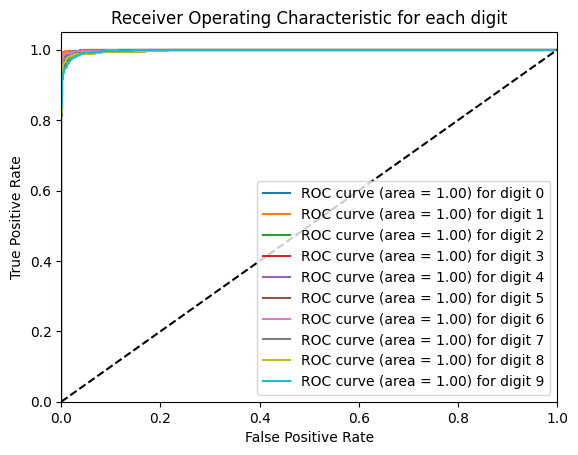

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

def evaluate(net, test_loader):
    net.eval()
    test_loss = 0
    correct = 0
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for data, target in test_loader:
            output = net(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_targets.extend(target.view_as(pred).numpy())
            all_outputs.extend(output.numpy())

    # Calculate metrics
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

    # Classification report and F1-Score
    all_preds = np.argmax(all_outputs, axis=1)
    print(classification_report(all_targets, all_preds))
    print("F1 Score:", f1_score(all_targets, all_preds, average='macro'))

    # ROC Curve for each class
    targets_one_hot = label_binarize(all_targets, classes=np.arange(10))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(targets_one_hot[:, i], np.array(all_outputs)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.figure()
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for digit {i}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for each digit')
    plt.legend(loc="lower right")
    plt.show()

evaluate(net, test_loader)


#CNN Architecture and Fundamentals

Convolutional Neural Networks (CNNs) are a specialized kind of neural network used primarily for processing data with a grid-like topology, such as images. CNNs have been particularly influential in the field of deep learning due to their ability to learn features automatically from images, reducing the need for manual feature extraction.

#### Basic Components of CNNs

1. **Convolutional Layers**:
   - The core building blocks of a CNN.
   - They apply a number of filters to the input. Each filter produces a feature map that emphasizes features detected in the input.
   - Essentially, convolutional operations involve sliding these filters across the input image and computing the dot product of the filter weights and the input pixels in a local region.

2. **Activation Functions**:
   - Typically ReLU (Rectified Linear Unit) is used after each convolution operation to introduce non-linearities into the model, helping it learn more complex patterns.

3. **Pooling Layers**:
   - Follow convolutional layers to reduce the spatial dimensions (width and height) of the input volume for the next convolutional layer.
   - They help reduce the number of parameters and computation in the network, and they also help achieve spatial invariance.
   - Common pooling operations include Max Pooling and Average Pooling.

4. **Fully Connected (Dense) Layers**:
   - After several convolutional and pooling layers, the high-level reasoning in the neural network is done via fully connected layers.
   - Neurons in a fully connected layer have full connections to all activations in the previous layer.
   - The output from the final fully connected layers is fed into a softmax or sigmoid layer for classification.

5. **Normalization Layers** (optional):
   - Layers like Batch Normalization or Layer Normalization might be used between layers to stabilize and accelerate the training process.

#### Example of a Simple CNN Architecture

Here’s how a simple CNN for classifying images from the MNIST dataset might be structured:
- Input: \(28 \times 28\) grayscale image (1 channel)
- Convolutional Layer #1: Applies 32 filters of size \(3 \times 3\)
- Activation Function: ReLU
- Pooling Layer #1: Performs max pooling with a \(2 \times 2\) filter and stride 2
- Convolutional Layer #2: Applies 64 filters of size \(3 \times 3\)
- Activation Function: ReLU
- Pooling Layer #2: Performs max pooling with a \(2 \times 2\) filter and stride 2
- Fully Connected Layer #1: 128 neurons
- Activation Function: ReLU
- Dropout: Drops out 50% of the nodes to prevent overfitting
- Fully Connected Layer #2 (Output Layer): 10 neurons (one for each digit) with softmax activation

#### How CNNs Learn

1. **Feature Learning**:
   - In the initial layers, CNNs learn to recognize basic patterns like edges and textures.
   - In deeper layers, they begin recognizing high-level features like objects or parts of objects.

2. **Backpropagation**:
   - Like other neural networks, CNNs use backpropagation to train the network.
   - The process involves computing the gradient of the loss function with respect to each weight by the chain rule, updating the weights in the direction that minimally reduces the loss.

3. **Parameter Sharing**:
   - A unique property of CNNs is that the weights of the filters are shared across the entire input.
   - This reduces the memory footprint and the number of parameters in the network.

#### Applications of CNNs

- **Image Classification**: Classifying images into predefined categories.
- **Object Detection**: Detecting objects within the image and classifying them (e.g., YOLO, SSD).
- **Image Segmentation**: Classifying each pixel in an image into a particular class.
- **Video Analysis**: Object tracking and action recognition in videos.
- **Natural Language Processing**: Although traditionally used for image data, CNNs have been successfully applied to sequential data such as text and audio.

CNNs continue to be at the forefront of many cutting-edge applications in AI, their ability to efficiently process spatial data makes them particularly well-suited for image and video recognition tasks.

# Building a Simple CNN for CIFAR-10

In [ ]:
import torch.multiprocessing as mp

# Use torch.multiprocessing instead of multiprocessing
mp.set_start_method('spawn', force=True)

import torch
import torchvision
import torchvision.transforms as transforms

# Data transformation with normalization
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize RGB channels

# Loading the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Loading the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:13<00:00, 12915221.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels (RGB), 6 output channels, 5x5 square convolution
        self.pool = nn.MaxPool2d(2, 2)   # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


[1,   500] loss: 0.575
[2,   500] loss: 0.559
Finished Training


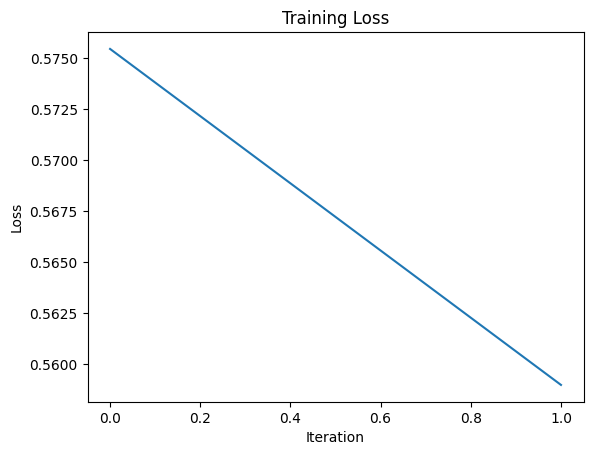

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the network
loss_history = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            loss_history.append(running_loss / 2000)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# Plotting the training loss
plt.figure()
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 25 %


### Overview of ImageNet Architectures

ImageNet is a large visual database designed for use in visual object recognition software research. Over the years, numerous architectures developed for ImageNet have become de facto standards for many deep learning image tasks. These architectures are often used as pretrained models due to their high accuracy and ability to learn robust features.

Here's an overview of some of the most influential ImageNet architectures:

#### 1. **AlexNet**
- **Introduction**: AlexNet was introduced in 2012 and significantly outperformed the competition at the ImageNet challenge (ILSVRC). It was the first to use ReLU activation and demonstrated the effectiveness of deep CNNs.
- **Architecture**: It consists of 5 convolutional layers followed by 3 fully-connected layers. It introduced the use of ReLU, local response normalization, and dropout.

#### 2. **VGG**
- **Introduction**: Developed by the Visual Graphics Group (VGG) at Oxford, this model was known for its simplicity, using only \(3 \times 3\) convolutional layers stacked on top of each other in increasing depth.
- **Architecture**: Reduces volume size by using max pooling. Two popular models are VGG-16 and VGG-19 (the numbers denote layers).

#### 3. **ResNet**
- **Introduction**: Introduced by Microsoft in 2015, ResNet (Residual Network) features skip connections or shortcuts to jump over some layers. It won the ILSVRC 2015.
- **Architecture**: Variants include ResNet-34, ResNet-50, ResNet-101, and ResNet-152, where the number signifies the layer count. Skip connections help to combat the vanishing gradient problem, allowing these networks to be very deep.

#### 4. **Inception (GoogleNet)**
- **Introduction**: This network introduced a novel architecture with “modules,” notably the inception module, which allows the network to choose from filters of various sizes in the same layer.
- **Architecture**: It uses a combination of \(1 \times 1\), \(3 \times 3\), and \(5 \times 5\) convolution filters to create a wider network rather than a deeper one. It also uses average pooling instead of fully connected layers at the top of the network.

#### 5. **DenseNet**
- **Introduction**: Similar to ResNet, DenseNet also proposes skip connections, but unlike ResNet, it connects each layer to every other layer in a feed-forward fashion.
- **Architecture**: Makes the network particularly deep but efficient in terms of parameters and computation, as it reuses features from all previous layers.


### Conclusion

These ImageNet architectures have significantly influenced the field of computer vision, and their pre-trained models are often used as starting points for many visual recognition tasks. Using these architectures, particularly with frameworks like PyTorch, allows for powerful, flexible implementations in both research and application development.

Different Neural Network Architectures:


1.   LeNet-5 : https://en.wikipedia.org/wiki/LeNet
2.   AlexNet : https://en.wikipedia.org/wiki/AlexNet , https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_alexnet.ipynb
3.   GoogleNet :https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_googlenet.ipynb
4.   VGGNet : https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_vgg.ipynb
5.   ResNet : https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_resnet.ipynb
6.   SENet : https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/nvidia_deeplearningexamples_se-resnext.ipynb



**ResNet-18 : CIFAR-10**

In [ ]:
import torch.multiprocessing as mp

# Use torch.multiprocessing instead of multiprocessing
mp.set_start_method('spawn', force=True)

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

# Define ResNet-18 Model
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, reduction=16):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = torch.relu(out)
        return out

class ResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(BasicBlock, 64, 2, stride=1)
        self.layer2 = self._make_layer(BasicBlock, 128, 2, stride=2)
        self.layer3 = self._make_layer(BasicBlock, 256, 2, stride=2)
        self.layer4 = self._make_layer(BasicBlock, 512, 2, stride=2)
        self.linear = nn.Linear(512 * BasicBlock.expansion, num_classes)

    def _make_layer(self, block, planes, blocks, stride):
        strides = [stride] + [1] * (blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, kernel_size=3, stride=2, padding=1)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        out = self.linear(out)
        return out

# Data Transformations and Loading
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False, num_workers=4)

# Training and Evaluation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNet18(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 20
train_loss_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_loss_list.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

    # Test the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracy_list.append(accuracy)
    print(f'Test Accuracy of the model on the 10000 test images: {accuracy:.2f}%')

    scheduler.step()

# Plot the loss curve
plt.figure()
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve')
plt.legend()
plt.show()


100%|██████████| 170498071/170498071 [00:02<00:00, 75745842.54it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified
Epoch [1/20], Loss: 1.5629
Test Accuracy of the model on the 10000 test images: 51.59%


KeyboardInterrupt: 

### Overview of R-CNN, Fast R-CNN, and Faster R-CNN

The R-CNN (Region-based Convolutional Neural Networks) family of models represents a series of innovations aimed at improving the speed and accuracy of object detection in images. Let's delve into each of these architectures, their design, and how they build upon each other.

#### R-CNN (Regions with CNN features)

**Introduction**:
- R-CNN, introduced by Ross Girshick et al. in 2014, was a breakthrough in the field of object detection. It addressed the challenge of locating and classifying objects within an image by combining high-capacity convolutional neural networks with region proposals.

**Architecture**:
1. **Region Proposals**: The first step involves generating candidate object bounding boxes (region proposals) in the image. This is done using selective search, which greedily merges superpixels based on their color, texture, size, and shape compatibility.
2. **Feature Extraction**: Each region proposal is then warped to a fixed size and passed through a pre-trained CNN (like AlexNet) to extract a feature vector.
3. **Classification**: These features are then fed into an SVM (Support Vector Machine) to classify the presence of an object within that region.
4. **Bounding Box Regression**: Finally, the bounding boxes are refined to better fit the detected objects using a linear regressor.

![R-CNN Architecture](https://miro.medium.com/max/1400/1*cwR_ezx0jliDvVUV6yno5g.png)

*Image Source: Medium*



#### Fast R-CNN

**Introduction**:
- Developed by the same researcher, Ross Girshick, Fast R-CNN was introduced in 2015 to improve the speed and training process of the original R-CNN by sharing computations and using integrated training processes.

**Architecture**:
1. **Single Network for Feature Extraction**: Unlike R-CNN, Fast R-CNN uses the entire image to compute a convolutional feature map just once and then extracts features for each region proposal from this shared map, significantly speeding up processing.
2. **ROI Pooling Layer**: Features extracted from these region proposals are then pooled using a Region of Interest (ROI) pooling layer, which ensures that the outputs have a fixed size to be sent through a fully connected network.
3. **Classification and Bounding Box Regression**: It introduces a multi-task loss that allows the use of a softmax layer for classifying objects and a linear regression for bounding box predictions simultaneously, within a single model.

![Fast R-CNN Architecture](https://miro.medium.com/max/1838/1*JlE5NSIafeoMwHHnpF2elA.png)

*Image Source: Medium*

#### Faster R-CNN

**Introduction**:
- Faster R-CNN, introduced by Shaoqing Ren et al. in 2015, addresses one of the biggest bottlenecks in Fast R-CNN— the use of selective search algorithm for generating region proposals, which was slow and computationally expensive.

**Architecture**:
1. **Region Proposal Network (RPN)**: Faster R-CNN introduces a fully convolutional network called Region Proposal Network that predicts object bounds and objectness scores at each position simultaneously. This network is fast and shares full-image convolutional features with the detection network, thus enabling nearly cost-free region proposals.
2. **ROI Pooling**: Similar to Fast R-CNN, the proposed regions are then pooled from the feature map.
3. **Classification and Regression**: These features go into a series of fully connected layers that predict the class and refine the bounding box coordinates of each proposed region.

![Faster R-CNN Architecture](https://miro.medium.com/max/1400/1*QOGcvHbrDZiCqTG6THIQ_w.png)

*Image Source: Medium*

### Conclusion

These architectures represent significant milestones in the field of computer vision, especially for tasks involving object detection. Each iteration in the R-CNN family brought improvements over its predecessor, reducing computational costs, improving detection performance, and speeding up the detection process. These models have set the foundation for many modern object detection systems, including those built on frameworks like YOLO (You Only Look Once) and SSD (Single Shot Multibox Detector).


### R-CNN (Region-based Convolutional Neural Networks)

#### Dataset
- Typically uses object detection datasets like PASCAL VOC, COCO, etc.
- Contains images with annotations specifying bounding boxes and class labels for objects.

#### Input Format
- Input images of varying sizes.
- Preprocessed to a fixed size using a selective search algorithm to generate region proposals.

#### Output Format
- Bounding boxes and class labels for detected objects.

#### Architecture Details
- Extract region proposals using selective search.
- Warp each region proposal to a fixed size and pass it through a CNN to extract features.
- Use SVMs to classify the features and regressors to refine the bounding boxes.

#### Transformation of Input to Output
1. **Region Proposal**: Selective search generates region proposals.
2. **Feature Extraction**: CNN extracts features for each proposal.
3. **Classification**: SVM classifies the object within the proposal.
4. **Bounding Box Regression**: Regressors refine the bounding box coordinates.

### Fast R-CNN

#### Dataset
- Same as R-CNN: PASCAL VOC, COCO, etc.
- Images with annotated bounding boxes and class labels.

#### Input Format
- Input images of varying sizes.
- Region proposals generated using selective search or other methods.

#### Output Format
- Bounding boxes and class labels for detected objects.

#### Architecture Details
- Single CNN processes the entire image to extract feature maps.
- Region of Interest (RoI) pooling extracts fixed-size feature maps for each region proposal.
- Fully connected layers classify the object and regress the bounding box coordinates.

#### Transformation of Input to Output
1. **Feature Extraction**: CNN extracts feature maps from the entire image.
2. **RoI Pooling**: Extracts fixed-size feature maps for each region proposal.
3. **Classification and Regression**: Fully connected layers classify objects and refine bounding boxes.

### Faster R-CNN

#### Dataset
- Same as R-CNN and Fast R-CNN: PASCAL VOC, COCO, etc.
- Images with annotated bounding boxes and class labels.

#### Input Format
- Input images of varying sizes.

#### Output Format
- Bounding boxes and class labels for detected objects.

#### Architecture Details
- Similar to Fast R-CNN but includes a Region Proposal Network (RPN).
- RPN shares convolutional layers with the object detection network.
- RPN generates region proposals, which are then refined and classified by the detection network.

#### Transformation of Input to Output
1. **Feature Extraction**: CNN extracts feature maps from the entire image.
2. **Region Proposal Network**: RPN generates region proposals.
3. **RoI Pooling**: Extracts fixed-size feature maps for each proposal.
4. **Classification and Regression**: Fully connected layers classify objects and refine bounding boxes.

### YOLO (You Only Look Once)

#### Dataset
- Commonly uses datasets like PASCAL VOC, COCO, etc.
- Images with annotated bounding boxes and class labels.

#### Input Format
- Input images of a fixed size (e.g., 416x416 pixels).

#### Output Format
- Grid of bounding boxes with class probabilities and confidence scores.

#### Architecture Details
- Single neural network predicts bounding boxes and class probabilities directly from full images in one pass.
- The image is divided into an SxS grid. Each grid cell predicts B bounding boxes and class probabilities.

#### Transformation of Input to Output
1. **Image Resizing**: Resize the input image to a fixed size (e.g., 416x416).
2. **Grid Prediction**: The network predicts bounding boxes, class probabilities, and confidence scores for each grid cell.
3. **Post-processing**: Apply non-max suppression to remove duplicate boxes and thresholding to filter low-confidence detections.

### Summary Table

| Algorithm      | Dataset        | Input Format         | Output Format                                    | Architecture Details                                                                                       | Transformation Process                                                                                     |
|----------------|----------------|----------------------|--------------------------------------------------|------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| R-CNN          | PASCAL VOC, COCO | Varying size images  | Bounding boxes and class labels                  | Selective search for region proposals, CNN for feature extraction, SVM for classification                   | 1. Selective search for proposals<br>2. CNN extracts features<br>3. SVM classifies<br>4. Regressors refine bounding boxes |
| Fast R-CNN     | PASCAL VOC, COCO | Varying size images  | Bounding boxes and class labels                  | Single CNN extracts feature maps, RoI pooling for proposals, Fully connected layers for classification and regression | 1. CNN extracts feature maps<br>2. RoI pooling<br>3. Fully connected layers classify and regress bounding boxes |
| Faster R-CNN   | PASCAL VOC, COCO | Varying size images  | Bounding boxes and class labels                  | Shared convolutional layers with RPN for proposals, RoI pooling, Fully connected layers for classification and regression | 1. CNN extracts feature maps<br>2. RPN generates proposals<br>3. RoI pooling<br>4. Fully connected layers classify and regress |
| YOLO           | PASCAL VOC, COCO | Fixed size images    | Grid of bounding boxes with class probabilities and confidence scores | Single neural network predicts bounding boxes and class probabilities from full images in one pass         | 1. Resize image<br>2. Network predicts grid<br>3. Post-processing with non-max suppression and thresholding |

This table and explanations summarize how each algorithm processes input images to output detected objects, highlighting their unique architectures and methodologies.

100%|██████████| 1999639040/1999639040 [00:10<00:00, 184892505.60it/s]


Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 78.5MB/s]


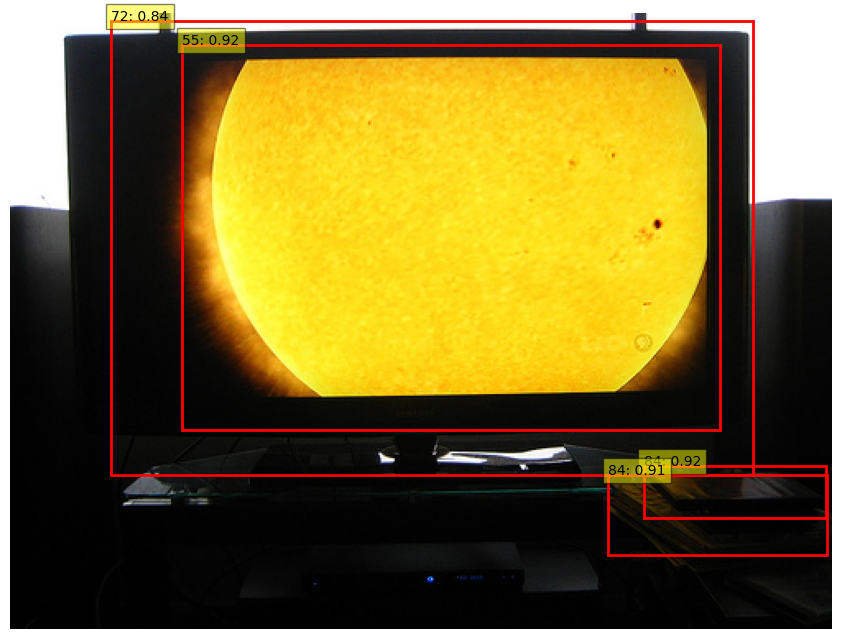

In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the model, with an optional fine-tuning function
def get_model(num_classes, fine_tune=False):
    # Load a pre-trained model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    if fine_tune:
        # Get the number of input features for the classifier
        in_features = model.roi_heads.box_predictor.cls_score.in_features
        # Replace the pre-trained head with a new one
        model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# Define a function to get transforms
def get_transform():
    return torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])

# Load the VOC dataset with downloading
dataset = torchvision.datasets.VOCDetection(
    root='./data',
    year='2012',
    image_set='val',
    download=True,
    transform=get_transform()
)
model = get_model(num_classes=21, fine_tune=False)  # VOC has 20 classes + background

# Set the model to evaluation mode
model.eval()



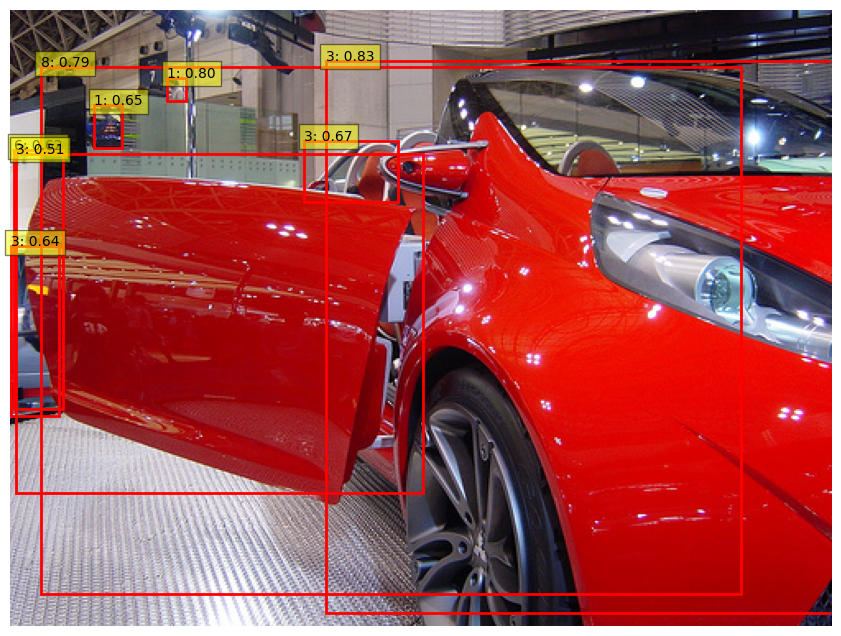

In [ ]:
# Load an image and its target
image, target = dataset[7]
image = image.unsqueeze(0)  # Add a batch dimension

# Make predictions
with torch.no_grad():
    predictions = model(image)

# Extract bounding boxes and labels
boxes = predictions[0]['boxes'].numpy()
labels = predictions[0]['labels'].numpy()
scores = predictions[0]['scores'].numpy()

# Plot the image with bounding boxes
def plot_boxes(image, boxes, labels, scores, threshold=0.5):
    plt.figure(figsize=(12, 8))
    plt.imshow(np.transpose(image.squeeze(0).numpy(), (1, 2, 0)))

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=2)
            plt.gca().add_patch(rect)
            plt.text(xmin, ymin, f'{label}: {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Plot the bounding boxes on the image
plot_boxes(image, boxes, labels, scores)


In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 10.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a function to get transforms
def get_transform():
    return transforms.Compose([
        transforms.ToTensor(),
    ])

# Load the VOC dataset with downloading
dataset = datasets.VOCDetection(
    root='./data',
    year='2012',
    image_set='val',
    download=True,
    transform=get_transform()
)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)

# Get a sample image and target
sample = next(iter(data_loader))
image, target = sample

# Extract the image tensor and remove batch dimension
image = image.squeeze(0)

# Convert image to numpy array for visualization
image_np = image.permute(1, 2, 0).numpy()


Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


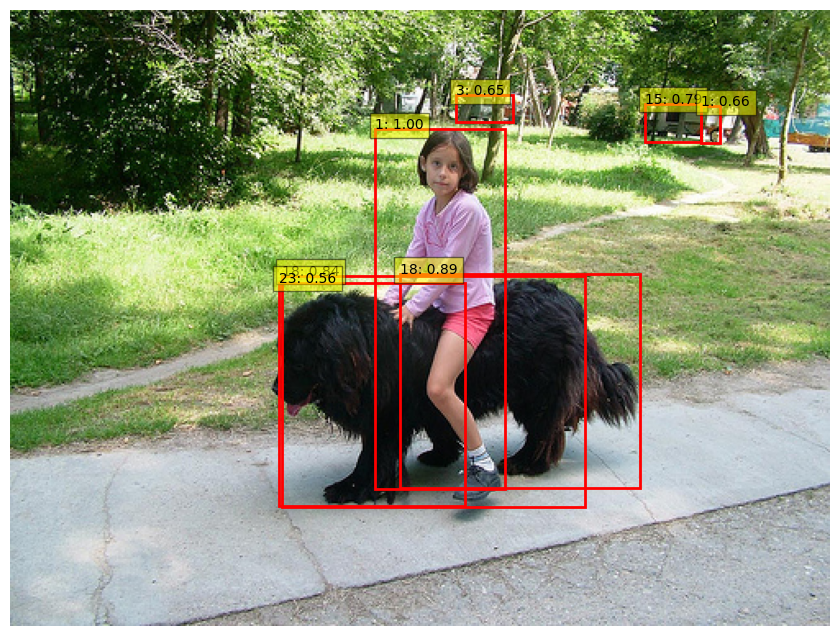

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load Faster R-CNN model pre-trained on COCO
model_faster_rcnn = fasterrcnn_resnet50_fpn(pretrained=True)
model_faster_rcnn.to(device)
model_faster_rcnn.eval()

# Prepare the image for the model
image = image.to(device)

# Make predictions using Faster R-CNN
with torch.no_grad():
    predictions_faster_rcnn = model_faster_rcnn([image])

# Extract bounding boxes, labels, and scores
boxes_faster_rcnn = predictions_faster_rcnn[0]['boxes'].cpu().numpy()
labels_faster_rcnn = predictions_faster_rcnn[0]['labels'].cpu().numpy()
scores_faster_rcnn = predictions_faster_rcnn[0]['scores'].cpu().numpy()

# Plot the image with bounding boxes
def plot_boxes(image, boxes, labels, scores, threshold=0.5):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=2)
            plt.gca().add_patch(rect)
            plt.text(xmin, ymin, f'{label}: {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Plot Faster R-CNN bounding boxes
plot_boxes(image_np, boxes_faster_rcnn, labels_faster_rcnn, scores_faster_rcnn)


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 51.8MB/s]



0: 512x640 1 person, 1 dog, 582.4ms
Speed: 31.2ms preprocess, 582.4ms inference, 18.1ms postprocess per image at shape (1, 3, 512, 640)


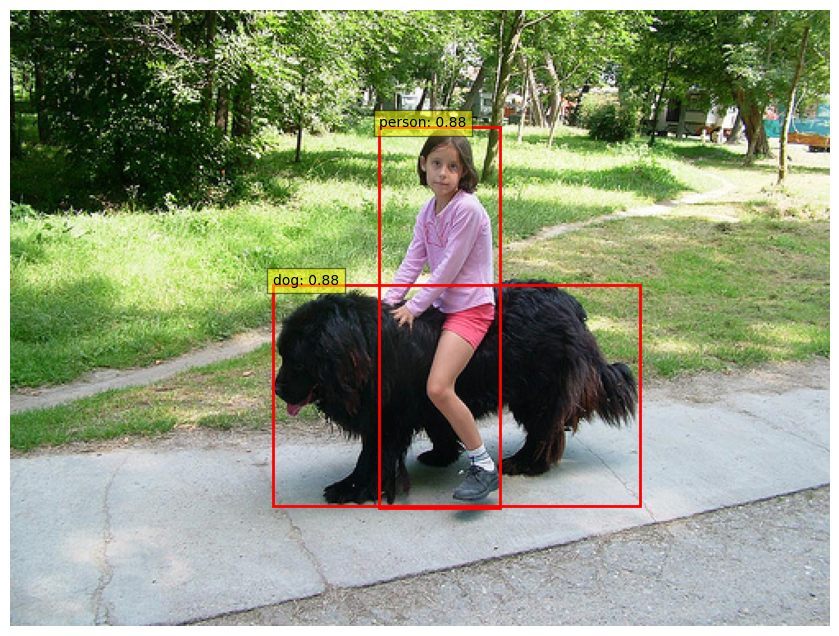

In [ ]:
!pip install ultralytics

from ultralytics import YOLO

# Load YOLO model
model_yolo = YOLO('yolov5s.pt')  # You can choose different YOLO models, e.g., 'yolov5m.pt', 'yolov5l.pt', etc.

# Convert image to numpy array and scale to 255
image_np_scaled = (image_np * 255).astype(np.uint8)

# YOLO model expects images in numpy format
results_yolo = model_yolo(image_np_scaled)

# Extract bounding boxes, labels, and scores
boxes_yolo = results_yolo[0].boxes.xyxy.cpu().numpy()
scores_yolo = results_yolo[0].boxes.conf.cpu().numpy()
labels_yolo = [model_yolo.names[int(cls)] for cls in results_yolo[0].boxes.cls.cpu().numpy()]

# Plot YOLO bounding boxes
plot_boxes(image_np, boxes_yolo, labels_yolo, scores_yolo)


### Recurrent Neural Networks (RNNs)

#### Overview
Recurrent Neural Networks (RNNs) are a class of artificial neural networks designed for processing sequences of data. Unlike traditional feedforward neural networks, RNNs have connections that loop back on themselves, allowing information to persist across time steps. This characteristic makes RNNs suitable for tasks where context and order matter, such as time series prediction, language modeling, and sequence generation.

#### Data Types
- **Input**: Sequences of data (e.g., time series, text, speech).
  - Format: A sequence of vectors, where each vector represents an element in the sequence.
  - Example: For a sentence, each word can be represented as a vector (word embedding).

- **Output**: Sequences of data or a single value, depending on the task.
  - Format: A sequence of vectors or a single vector.
  - Example: For language modeling, the output is a sequence of probabilities for the next word in the sequence.

#### Model Details
- **Architecture**: Consists of input, hidden, and output layers.
  - **Input Layer**: Takes the current input vector.
  - **Hidden Layer**: Contains recurrent connections that loop back to itself.
  - **Output Layer**: Produces the output for the current time step.

- **Hidden State**: Captures information from previous time steps.
  - At each time step \( t \), the hidden state \( h_t \) is updated based on the current input \( x_t \) and the previous hidden state \( h_{t-1} \).
  - The update rule: $$
h_t = \text{tanh}(W_{hx} x_t + W_{hh} h_{t-1} + b_h)
$$
 where \( W_{hx} \), \( W_{hh} \), and \( b_h \) are parameters.

#### Problem Solved
RNNs are designed to solve problems involving sequential data, where the order of inputs is crucial. They are effective in tasks such as:
- Time series forecasting
- Natural language processing (NLP)
- Speech recognition
- Video analysis

### Long Short-Term Memory (LSTM)

#### Overview
LSTMs are a special type of RNN designed to overcome the limitations of traditional RNNs, specifically the issue of long-term dependencies. LSTMs use gates to control the flow of information, allowing them to remember important information for longer periods.

#### Data Types
- **Input**: Same as RNNs (sequences of data).
- **Output**: Same as RNNs (sequences of data or a single value).

#### Model Details
- **Architecture**: Consists of cells, input gates, forget gates, and output gates.
  - **Cell State**: Acts as a conveyor belt, carrying information across time steps with minimal changes.
  - **Gates**: Control the flow of information:

Forget gate:

$$
f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)
$$

Input gate:

$$
i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)
$$

Output gate:

$$
o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)
$$

Cell state update:

$$
C_t = f_t * C_{t-1} + i_t * \text{tanh}(W_C [h_{t-1}, x_t] + b_C)
$$

Hidden state update:

$$
h_t = o_t * \text{tanh}(C_t)
$$

#### Problem Solved
LSTMs address the vanishing gradient problem of traditional RNNs, making them better suited for tasks that require learning long-term dependencies. They are particularly effective in:
- Long-term time series prediction
- Language modeling with longer context
- Speech synthesis and recognition
- Video analysis with extended temporal context

### ChatGPT (Generative Pre-trained Transformer)

#### Overview
ChatGPT is based on the Transformer architecture, which is fundamentally different from RNNs and LSTMs. Transformers use self-attention mechanisms to process sequences, allowing them to handle long-range dependencies without the issues faced by RNNs and LSTMs.

#### Data Types
- **Input**: Text sequences.
  - Format: Tokenized text (each word or subword token is represented as an embedding).

- **Output**: Text sequences.
  - Format: Tokenized text (predicted next tokens).

#### Model Details
- **Architecture**: Composed of an encoder and a decoder (ChatGPT uses the decoder part of the Transformer).
  - **Self-Attention**: Allows the model to weigh the importance of different words in a sequence when making predictions.
    - Formula: $$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$
 Queries, Keys, and Values matrices derived from the input.

- **Layers**: Stacked layers of self-attention and feedforward neural networks.
  - Each layer has multiple attention heads that capture different aspects of the input.

- **Positional Encoding**: Adds information about the position of words in the sequence to the input embeddings.

#### Problem Solved
ChatGPT and the Transformer architecture excel at capturing long-range dependencies and parallelizing computations, making them highly efficient and effective for tasks such as:
- Natural language understanding and generation
- Machine translation
- Summarization
- Dialogue systems

### Comparison: RNNs vs LSTMs vs ChatGPT

| Feature               | RNNs                               | LSTMs                                         | ChatGPT (Transformer)                                   |
|-----------------------|------------------------------------|-----------------------------------------------|--------------------------------------------------------|
| **Data Type**         | Sequential data                    | Sequential data                               | Text sequences                                         |
| **Architecture**      | Recurrent connections, hidden state | Cells with input, forget, and output gates    | Self-attention, encoder-decoder (or decoder only)      |
| **Output**            | Sequential data or single value    | Sequential data or single value               | Text sequences                                         |
| **Problem Solved**    | Sequential tasks with short context | Sequential tasks with long-term dependencies  | Long-range dependencies, parallel processing           |
| **Advantages**        | Simplicity, captures short-term dependencies | Solves vanishing gradient, captures long-term dependencies | Handles long-range dependencies, efficient computation |
| **Disadvantages**     | Vanishing gradient problem         | Complex architecture, computationally intensive | Requires large datasets, high computational resources  |

### Summary
- **RNNs** are suitable for tasks with short-term dependencies but struggle with long-term dependencies due to the vanishing gradient problem.
- **LSTMs** extend RNNs by introducing gates to manage information flow, effectively handling long-term dependencies.
- **ChatGPT** leverages the Transformer architecture, using self-attention mechanisms to efficiently capture long-range dependencies and process sequences in parallel, making it highly effective for various NLP tasks.

By understanding these differences, we can choose the appropriate model architecture for specific sequential tasks, taking advantage of the strengths of each approach.

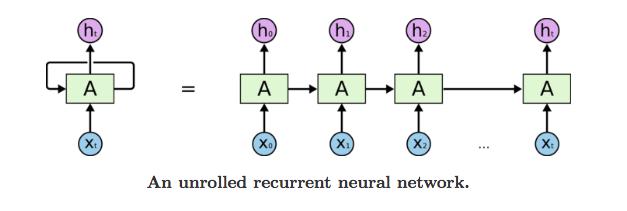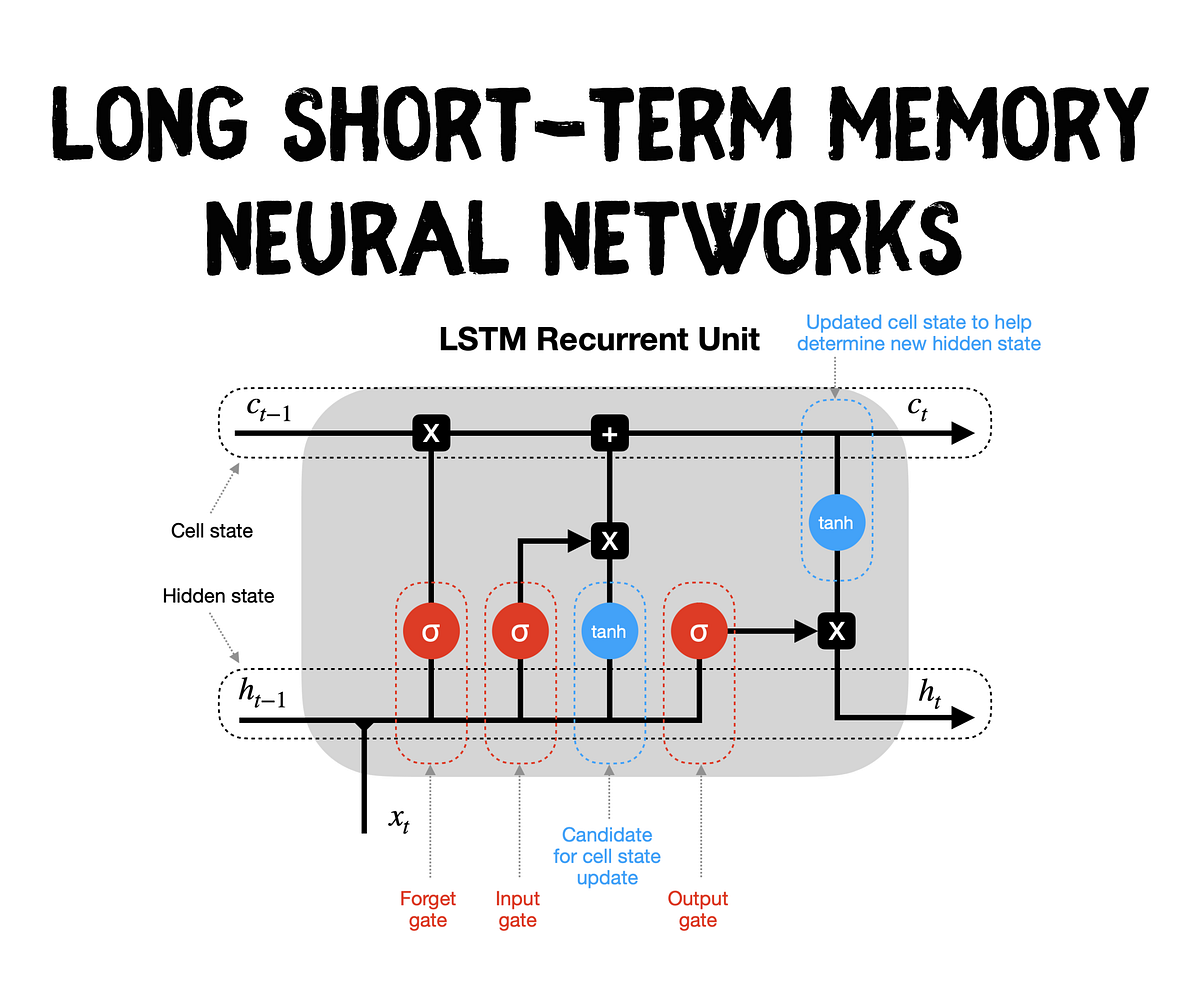

In [ ]:
!pip install torchtext portalocker


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Sample text data
text_data = [
    "hello how are you",
    "i am fine thank you",
    "how about you",
    "i am good too",
    "nice to hear that",
    "have a great day",
]

# Define tokenizer
tokenizer = get_tokenizer("basic_english")

# Build vocabulary
counter = Counter()
for line in text_data:
    counter.update(tokenizer(line))

vocab = {word: idx for idx, (word, _) in enumerate(counter.items(), start=1)}
vocab['<unk>'] = 0

# Function to encode text into tensor
def text_pipeline(x):
    return torch.tensor([vocab.get(token, vocab['<unk>']) for token in tokenizer(x)], dtype=torch.long)

# Define a custom dataset
class TextDataset(Dataset):
    def __init__(self, data, seq_len):
        self.data = [text_pipeline(text) for text in data]
        self.seq_len = seq_len
        self.data = torch.cat(self.data)

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        return (self.data[idx:idx+self.seq_len], self.data[idx+1:idx+self.seq_len+1])

seq_len = 5
dataset = TextDataset(text_data, seq_len)
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)


/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden):
        x = self.embed(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out.reshape(out.size(0) * out.size(1), out.size(2)))
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(num_layers, batch_size, hidden_size).to(device)

# Hyperparameters
vocab_size = len(vocab)
embed_size = 128
hidden_size = 256
num_layers = 2
num_epochs = 10
learning_rate = 0.002

model = RNNModel(vocab_size, embed_size, hidden_size, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


Epoch [1/10], Loss: 1.6655
Epoch [2/10], Loss: 0.3388
Epoch [3/10], Loss: 0.2035
Epoch [4/10], Loss: 0.1638
Epoch [5/10], Loss: 0.1784
Epoch [6/10], Loss: 0.1419
Epoch [7/10], Loss: 0.1641
Epoch [8/10], Loss: 0.1271
Epoch [9/10], Loss: 0.1346
Epoch [10/10], Loss: 0.1472


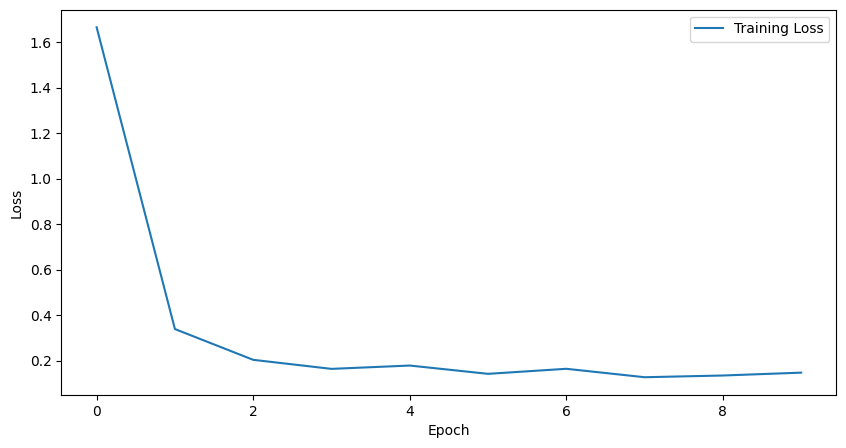

In [ ]:
# Training the model
losses = []

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for i, (inputs, targets) in enumerate(data_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Initialize hidden state
        hidden = model.init_hidden(inputs.size(0))

        hidden = hidden.detach()
        outputs, hidden = model(inputs, hidden)
        loss = criterion(outputs, targets.reshape(-1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(data_loader)
    losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Plot the loss
plt.figure(figsize=(10,5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Let's delve into the details of the input, output, and the transformations that happen during the training of the RNN model.

### Input and Output

#### Input
- **Type**: Sequential text data.
- **Format**: The input data is a sequence of words converted to their corresponding integer indices using the vocabulary.
- **Shape**: The shape of the input tensor is `(batch_size, seq_len)`, where `seq_len` is the length of the sequence, and `batch_size` is the number of sequences processed together in one forward pass.

#### Output
- **Type**: Predicted next word for each word in the input sequence.
- **Format**: The output data is a sequence of predicted words represented as integer indices.
- **Shape**: The shape of the output tensor is `(batch_size * seq_len, vocab_size)`, where `vocab_size` is the total number of unique words in the vocabulary. This shape is because we predict the next word for each word in the input sequence.

### Transformation Steps

1. **Text Data to Tensors**:
   - **Original Text Data**: ["hello how are you", "i am fine thank you", "how about you", ...]
   - **Tokenization**: Each sentence is tokenized into words: `["hello", "how", "are", "you"]`.
   - **Encoding**: Each word is converted to its corresponding index from the vocabulary: `[1, 2, 3, 4]`.

2. **Dataset Preparation**:
   - **Sequences**: The text data is divided into sequences of length `seq_len`.
   - **Target Sequences**: For each input sequence, the target sequence is the same sequence shifted by one position.
   - **Example**:
     - **Input**: `["hello", "how", "are", "you"]`
     - **Encoded Input**: `[1, 2, 3, 4]`
     - **Target**: `["how", "are", "you", "i"]`
     - **Encoded Target**: `[2, 3, 4, 5]`

3. **Data Loader**:
   - **Batching**: The sequences are batched together to form tensors of shape `(batch_size, seq_len)`.
   - **Example**:
     - **Batch Input**: `[[1, 2, 3, 4], [5, 6, 7, 8]]`
     - **Batch Target**: `[[2, 3, 4, 5], [6, 7, 8, 9]]`

4. **Model Forward Pass**:
   - **Embedding Layer**:
     - Transforms the input indices into dense vectors (embeddings) of shape `(batch_size, seq_len, embed_size)`.
     - **Example**: `[[1, 2, 3, 4], [5, 6, 7, 8]]` -> `[[[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8]], ...]`
   - **RNN Layer**:
     - Processes the embedded input sequence and captures temporal dependencies.
     - The output from the RNN has shape `(batch_size, seq_len, hidden_size)`.
     - **Example**: `[[[0.1, 0.2], [0.3, 0.4], ...]]` -> `[[[0.2, 0.3], [0.4, 0.5], ...]]`
   - **Fully Connected Layer**:
     - Transforms the RNN outputs to predictions for each word in the vocabulary.
     - The output is reshaped to `(batch_size * seq_len, vocab_size)`.
     - **Example**: `[[[0.2, 0.3], [0.4, 0.5], ...]]` -> `[[0.2, 0.1, 0.3, ...], [0.5, 0.4, 0.2, ...], ...]`

5. **Loss Calculation and Backpropagation**:
   - **Loss Calculation**: The predicted output is compared with the target sequences using CrossEntropyLoss.
   - **Backpropagation**: The gradients are computed, and the model parameters are updated to minimize the loss.

### Detailed Explanation of the Transformation Steps

1. **Text Data to Tensors**:
   - The raw text data is tokenized into words and converted to integer indices based on the vocabulary. This step transforms human-readable text into a numerical format that can be processed by the model.

2. **Dataset Preparation**:
   - The sequences of text are prepared with a fixed length (`seq_len`). Each sequence is paired with a target sequence that is shifted by one position. This setup helps the model learn to predict the next word in the sequence.

3. **Data Loader**:
   - The sequences are batched together. Batching allows the model to process multiple sequences in parallel, improving training efficiency.

4. **Model Forward Pass**:
   - **Embedding Layer**: Converts the integer indices to dense vectors (embeddings). These embeddings capture semantic information about the words.
   - **RNN Layer**: Processes the embeddings sequentially and captures the temporal dependencies between words in the sequence. The RNN maintains a hidden state that is updated at each time step.
   - **Fully Connected Layer**: Maps the RNN outputs to predictions for each word in the vocabulary. The output shape is adjusted to match the expected input shape for the loss function.

5. **Loss Calculation and Backpropagation**:
   - The CrossEntropyLoss function compares the model's predictions with the actual target sequences and computes the loss. Backpropagation computes the gradients of the loss with respect to the model parameters, and the optimizer updates the parameters to minimize the loss.

### Summary

- **Input**: Sequential text data, tokenized and encoded into integer indices.
- **Output**: Predicted next word for each word in the input sequence, represented as integer indices.
- **Transformation**: The model transforms the input through an embedding layer, RNN layer, and fully connected layer to produce predictions. The training loop calculates the loss, performs backpropagation, and updates the model parameters to minimize the loss.

This process enables the RNN model to learn the temporal dependencies in the text data and make accurate predictions for the next word in a sequence.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18010852.35it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 505853.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4496350.98it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3857944.26it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
num_epochs = 10
learning_rate = 0.001

model = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


Epoch [1/10], Loss: 0.4211
Epoch [2/10], Loss: 0.1065
Epoch [3/10], Loss: 0.0702
Epoch [4/10], Loss: 0.0545
Epoch [5/10], Loss: 0.0446
Epoch [6/10], Loss: 0.0366
Epoch [7/10], Loss: 0.0315
Epoch [8/10], Loss: 0.0280
Epoch [9/10], Loss: 0.0250
Epoch [10/10], Loss: 0.0226


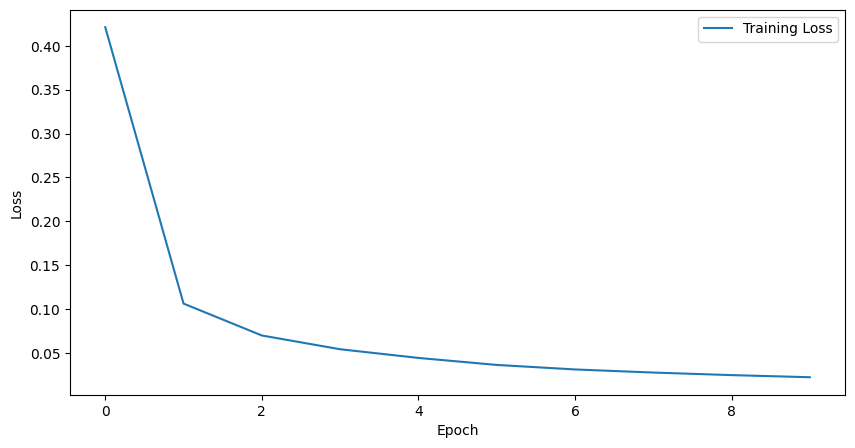

In [ ]:
# Training the model
losses = []

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28, 28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.reshape(-1, 28, 28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        print("Input:")
        print(images.cpu().numpy().reshape(28, 28))
        print("Predicted Label:", predicted.item())
        print("True Label:", labels.item())
        break


Input:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        

In [ ]:
!pip install torchtext

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import random
import string

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate random text data
def generate_random_text(length):
    return ''.join(random.choices(string.ascii_lowercase + ' ', k=length))

# Create a large random text
random_text = generate_random_text(100000)

# Tokenize the text
tokens = list(random_text)
vocab = {char: idx for idx, char in enumerate(set(tokens))}
vocab_size = len(vocab)

# Function to encode text into tensor
def text_pipeline(x):
    return torch.tensor([vocab[char] for char in x], dtype=torch.long)

# Define a custom dataset
class TextDataset(Dataset):
    def __init__(self, text, seq_len):
        self.data = text_pipeline(text)
        self.seq_len = seq_len

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        return (self.data[idx:idx+self.seq_len], self.data[idx+1:idx+self.seq_len+1])

seq_len = 30
dataset = TextDataset(random_text, seq_len)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden):
        x = self.embed(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out.reshape(out.size(0) * out.size(1), out.size(2)))
        return out, hidden

    def init_hidden(self, batch_size):
        return (torch.zeros(num_layers, batch_size, hidden_size).to(device),
                torch.zeros(num_layers, batch_size, hidden_size).to(device))

# Hyperparameters
embed_size = 128
hidden_size = 256
num_layers = 2
num_epochs = 10
learning_rate = 0.002

model = LSTMModel(vocab_size, embed_size, hidden_size, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


Epoch [1/10], Loss: 2.3531
Epoch [2/10], Loss: 1.0107
Epoch [3/10], Loss: 0.7854
Epoch [4/10], Loss: 0.7054
Epoch [5/10], Loss: 0.6566
Epoch [6/10], Loss: 0.6205
Epoch [7/10], Loss: 0.5948
Epoch [8/10], Loss: 0.5702
Epoch [9/10], Loss: 0.5523
Epoch [10/10], Loss: 0.5362


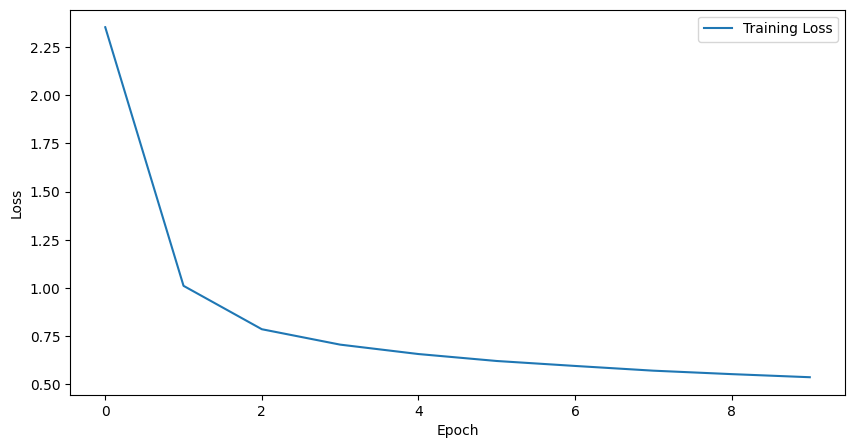

In [ ]:
# Training the model
losses = []

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for i, (inputs, targets) in enumerate(data_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Initialize hidden state
        hidden = model.init_hidden(inputs.size(0))

        hidden = tuple([h.detach() for h in hidden])
        outputs, hidden = model(inputs, hidden)
        loss = criterion(outputs, targets.reshape(-1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(data_loader)
    losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    for i, (inputs, targets) in enumerate(data_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Initialize hidden state
        hidden = model.init_hidden(inputs.size(0))
        outputs, hidden = model(inputs, hidden)
        _, predicted = torch.max(outputs.data, 1)

        print("Input:")
        print(''.join([list(vocab.keys())[list(vocab.values()).index(idx)] for idx in inputs[0].cpu().numpy()]))
        print("Predicted Output:")
        print(''.join([list(vocab.keys())[list(vocab.values()).index(idx)] for idx in predicted.cpu().numpy()[:seq_len]]))
        print("True Output:")
        print(''.join([list(vocab.keys())[list(vocab.values()).index(idx)] for idx in targets[0].cpu().numpy()]))
        break


Input:
jhanwpwwmbynzmcomlamfduaxndlex
Predicted Output:
kwkwpwwmbyncmcomlamfduaxndlexw
True Output:
hanwpwwmbynzmcomlamfduaxndlexw


### Data Preparation

**Generating Random Text:**
- **Function**: `generate_random_text(length)`
- **Purpose**: Creates a string of random characters of specified length.
- **Example**: `'abcde fghij klmno pqrst uvwxy z'`

**Creating the Dataset:**
- **Tokenization**: Each character in the string is treated as a token.
- **Vocabulary Building**: Each unique character is assigned a unique index.
- **Example**:
  - **Tokens**: `['a', 'b', 'c', 'd', ...]`
  - **Vocabulary**: `{'a': 0, 'b': 1, 'c': 2, ' ': 26, ...}`

**Encoding Text into Tensors:**
- **Function**: `text_pipeline(x)`
- **Purpose**: Converts a sequence of characters into a tensor of their corresponding indices.
- **Example**: `'abc'` -> `[0, 1, 2]`

**Custom Dataset:**
- **Class**: `TextDataset`
- **Purpose**: Creates sequences of characters for the model to learn.
- **Example**:
  - **Input Sequence**: `'abcde'` -> `[0, 1, 2, 3, 4]`
  - **Target Sequence**: `'bcdef'` -> `[1, 2, 3, 4, 5]`

**DataLoader:**
- **Purpose**: Provides batches of sequences for training.
- **Example**:
  - **Batch Input**: `[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]`
  - **Batch Target**: `[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]`

### LSTM Model

**Model Architecture:**
- **Layers**:
  - **Embedding Layer**: Converts input indices into dense vectors.
  - **LSTM Layer**: Processes embedded input sequence and captures temporal dependencies.
  - **Fully Connected Layer**: Maps LSTM outputs to predictions for each character in the vocabulary.
- **Example**:
  - **Input Shape**: `(batch_size, seq_len)`
  - **Embedding Output Shape**: `(batch_size, seq_len, embed_size)`
  - **LSTM Output Shape**: `(batch_size, seq_len, hidden_size)`
  - **Fully Connected Output Shape**: `(batch_size * seq_len, vocab_size)`

### Training

**Training Loop:**
- **Process**:
  1. Initialize hidden state for each batch.
  2. Forward pass: Input sequences through the LSTM model.
  3. Calculate loss between predictions and target sequences.
  4. Backward pass: Compute gradients and update model parameters.
- **Loss Tracking**: Monitor and plot the average training loss per epoch.

**Example:**
- **Epoch Loop**: Iterate through multiple epochs.
- **Batch Loop**: Process each batch within an epoch.
  - **Input**: `[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]`
  - **Target**: `[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]`
  - **Predicted Output**: `[...predicted indices...]`
  - **True Output**: `[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]`

### Testing and Output

**Evaluation:**
- **Process**:
  1. Initialize hidden state for the test batch.
  2. Forward pass: Input sequences through the LSTM model.
  3. Compare predicted output with true target sequences.

**Example:**
- **Input Sequence**: `'abcde'` -> `[0, 1, 2, 3, 4]`
- **Predicted Output**: `'bcdef'` -> `[1, 2, 3, 4, 5]`
- **True Output**: `'bcdef'` -> `[1, 2, 3, 4, 5]`

### Seq2Seq Models and Attention Mechanisms

#### Seq2Seq Models

**Sequence-to-Sequence (Seq2Seq) models** are a type of neural network designed to transform a given sequence of elements (source) into another sequence (target). They are widely used in tasks such as machine translation, text summarization, and question answering.

##### Architecture

1. **Encoder**: Processes the input sequence and compresses its information into a fixed-size context vector.
2. **Decoder**: Uses the context vector to generate the output sequence, one element at a time.

The standard Seq2Seq model uses RNNs, LSTMs, or GRUs for both the encoder and the decoder.

##### Example: Simple Seq2Seq Model

Let's consider a simple Seq2Seq model for English-to-French translation.

**Encoder:**
- Takes an English sentence as input.
- Encodes it into a context vector.

**Decoder:**
- Takes the context vector and generates the French sentence.

#### Attention Mechanisms

**Attention mechanisms** address the limitation of Seq2Seq models that use a fixed-size context vector. Attention allows the decoder to focus on different parts of the input sequence at each step of the output sequence generation.

##### Types of Attention Mechanisms

1. **Additive Attention**: Computes the alignment scores using a feedforward neural network.
2. **Multiplicative (Dot-Product) Attention**: Computes the alignment scores using the dot product of the encoder hidden states and the decoder hidden state.

##### Example: Seq2Seq with Attention

**Encoder with Attention:**
- Same as the simple encoder but returns all hidden states.

**Attention Layer:**
- Computes attention weights and applies them to the encoder hidden states to create a context vector.

**Decoder with Attention:**
- Uses the context vector to generate the output sequence.

**Code Example (Seq2Seq with Attention):**

### Summary

- **Seq2Seq Models**: Consist of an encoder and decoder, useful for tasks requiring sequence transformation.
- **Attention Mechanisms**: Enhance Seq2Seq models by allowing the decoder to focus on different parts of the input sequence, improving performance on tasks like translation and summarization.
- **Implementation**: Involves creating an encoder, an attention layer, and a decoder with attention, followed by training the Seq2Seq model using a suitable loss function and optimizer.

By using these architectures and techniques, Seq2Seq models with attention can effectively handle complex sequence transformation tasks, leading to improved performance and flexibility.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate dummy data
def generate_data(num_samples, seq_len, vocab_size):
    data = []
    for _ in range(num_samples):
        src = [random.randint(1, vocab_size-1) for _ in range(seq_len)]
        tgt = src[::-1]  # Reverse the source sequence for the target
        data.append((src, tgt))
    return data

vocab_size = 20
seq_len = 10
num_samples = 1000
data = generate_data(num_samples, seq_len, vocab_size)

# Define dummy vocab (for demonstration purposes)
vocab = {str(i): i for i in range(vocab_size)}


In [ ]:
from torch.utils.data import Dataset, DataLoader

class Seq2SeqDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        src, tgt = self.data[idx]
        return torch.tensor(src, dtype=torch.long), torch.tensor(tgt, dtype=torch.long)

dataset = Seq2SeqDataset(data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Parameter(torch.rand(hidden_size))

    def forward(self, hidden, encoder_outputs):
        max_len = encoder_outputs.size(1)
        H = hidden.repeat(max_len, 1, 1).transpose(0, 1)
        attn_energies = self.score(H, encoder_outputs)
        return torch.softmax(attn_energies, dim=1).unsqueeze(1)

    def score(self, hidden, encoder_outputs):
        energy = torch.tanh(self.attn(torch.cat([hidden, encoder_outputs], 2)))
        energy = energy.transpose(1, 2)
        v = self.v.repeat(encoder_outputs.size(0), 1).unsqueeze(1)
        energy = torch.bmm(v, energy)
        return energy.squeeze(1)

class Encoder(nn.Module):
    def __init__(self, input_size, embed_size, hidden_size, num_layers):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        embedding = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedding)
        return outputs, hidden, cell

class Decoder(nn.Module):
    def __init__(self, output_size, embed_size, hidden_size, num_layers, attention):
        super(Decoder, self).__init__()
        self.output_size = output_size
        self.attention = attention
        self.embedding = nn.Embedding(output_size, embed_size)
        self.lstm = nn.LSTM(hidden_size + embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden, cell, encoder_outputs):
        x = x.unsqueeze(1)
        embedding = self.embedding(x)
        attn_weights = self.attention(hidden[-1], encoder_outputs)
        context = attn_weights.bmm(encoder_outputs)
        rnn_input = torch.cat((embedding, context), dim=2)
        outputs, (hidden, cell) = self.lstm(rnn_input, (hidden, cell))
        predictions = self.fc(outputs.squeeze(1))
        return predictions, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, source, target, teacher_forcing_ratio=0.5):
        batch_size = source.shape[0]
        target_len = target.shape[1]
        target_vocab_size = self.decoder.output_size

        outputs = torch.zeros(batch_size, target_len, target_vocab_size).to(device)

        encoder_outputs, hidden, cell = self.encoder(source)

        x = target[:, 0]

        for t in range(1, target_len):
            output, hidden, cell = self.decoder(x, hidden, cell, encoder_outputs)
            outputs[:, t, :] = output
            best_guess = output.argmax(1)
            x = target[:, t] if random.random() < teacher_forcing_ratio else best_guess

        return outputs

# Initialize the model
input_size = vocab_size
output_size = vocab_size
embed_size = 256
hidden_size = 512
num_layers = 2

attention = Attention(hidden_size)
encoder = Encoder(input_size, embed_size, hidden_size, num_layers).to(device)
decoder = Decoder(output_size, embed_size, hidden_size, num_layers, attention).to(device)
model = Seq2Seq(encoder, decoder).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (src, tgt) in enumerate(dataloader):
        src, tgt = src.to(device), tgt.to(device)

        optimizer.zero_grad()
        output = model(src, tgt)

        output = output[:, 1:].reshape(-1, output.shape[2])
        tgt = tgt[:, 1:].reshape(-1)

        loss = criterion(output, tgt)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 2.2991
Epoch [2/10], Loss: 1.9068
Epoch [3/10], Loss: 1.5534
Epoch [4/10], Loss: 1.1858
Epoch [5/10], Loss: 0.7255
Epoch [6/10], Loss: 0.6223
Epoch [7/10], Loss: 0.1599
Epoch [8/10], Loss: 0.2764
Epoch [9/10], Loss: 0.0454
Epoch [10/10], Loss: 0.0140


In [ ]:
model.eval()
with torch.no_grad():
    for i, (src, tgt) in enumerate(dataloader):
        src, tgt = src.to(device), tgt.to(device)

        output = model(src, tgt, teacher_forcing_ratio=0)
        output = output[:, 1:].reshape(-1, output.shape[2])
        tgt = tgt[:, 1:].reshape(-1)

        pred = output.argmax(1).view(-1, seq_len-1)
        print(f'Source: {src[0].cpu().numpy()}')
        print(f'Target: {tgt.view(-1, seq_len-1)[0].cpu().numpy()}')
        print(f'Predicted: {pred[0].cpu().numpy()}')
        break


Source: [12 14  3 15 11 16 10 13 16  1]
Target: [16 13 10 16 11 15  3 14 12]
Predicted: [16 13 10 16 11 15  3 14 12]


Let's break down the Seq2Seq models with attention mechanisms in terms of their input, output, and the transformations that occur at each stage of the process.

### Seq2Seq Models

#### Input
- **Source Sequence**: A sequence of tokens (e.g., words in a sentence) in the source language.
- **Example**: `"I am a student"` (English)

#### Output
- **Target Sequence**: A sequence of tokens in the target language, generated by the model.
- **Example**: `"Je suis étudiant"` (French)

### Transformations in Seq2Seq Model without Attention

1. **Embedding Layer (Encoder)**:
   - **Input**: Source sequence of tokens.
   - **Transformation**: Converts each token into a dense vector representation (embedding).
   - **Output**: Sequence of embeddings.
   - **Example**: `"I am a student"` -> `[embedding_I, embedding_am, embedding_a, embedding_student]`

2. **Encoder (RNN/LSTM/GRU)**:
   - **Input**: Sequence of embeddings.
   - **Transformation**: Processes the sequence using RNN/LSTM/GRU to capture temporal dependencies.
   - **Output**: Hidden states and cell states (context vector).
   - **Example**: Sequence of embeddings -> `[hidden_1, hidden_2, hidden_3, hidden_4]` (last hidden state is the context vector)

3. **Decoder Initialization**:
   - **Input**: Context vector from the encoder.
   - **Transformation**: Initializes the hidden state and cell state of the decoder.
   - **Output**: Initial hidden and cell states for the decoder.
   - **Example**: Context vector -> `hidden_decoder_0, cell_decoder_0`

4. **Embedding Layer (Decoder)**:
   - **Input**: Target sequence tokens (during training, use the actual target sequence; during inference, use the predicted tokens).
   - **Transformation**: Converts each token into an embedding.
   - **Output**: Sequence of embeddings.
   - **Example**: `"Je suis étudiant"` -> `[embedding_Je, embedding_suis, embedding_étudiant]`

5. **Decoder (RNN/LSTM/GRU)**:
   - **Input**: Sequence of embeddings and initial hidden states.
   - **Transformation**: Processes the sequence using RNN/LSTM/GRU to generate outputs.
   - **Output**: Sequence of outputs (logits).
   - **Example**: Sequence of embeddings -> `[logits_Je, logits_suis, logits_étudiant]`

6. **Fully Connected Layer**:
   - **Input**: Decoder outputs (logits).
   - **Transformation**: Maps the decoder outputs to the vocabulary size.
   - **Output**: Probability distribution over the vocabulary for each token.
   - **Example**: `[logits_Je, logits_suis, logits_étudiant]` -> `[prob_Je, prob_suis, prob_étudiant]`

### Transformations in Seq2Seq Model with Attention

1. **Embedding Layer (Encoder)**:
   - **Same as above**.

2. **Encoder (RNN/LSTM/GRU)**:
   - **Same as above** but the output includes all hidden states.
   - **Output**: Sequence of hidden states.
   - **Example**: Sequence of embeddings -> `[hidden_1, hidden_2, hidden_3, hidden_4]`

3. **Attention Mechanism**:
   - **Input**: Decoder's current hidden state and all encoder hidden states.
   - **Transformation**: Computes attention weights and applies them to encoder hidden states to create a context vector.
   - **Output**: Context vector.
   - **Example**: `hidden_decoder_t` and `[hidden_1, hidden_2, hidden_3, hidden_4]` -> `context_vector`

4. **Decoder Initialization**:
   - **Same as above**.

5. **Embedding Layer (Decoder)**:
   - **Same as above**.

6. **Decoder (RNN/LSTM/GRU) with Attention**:
   - **Input**: Decoder's embedding and context vector.
   - **Transformation**: Concatenates embedding with context vector and processes the sequence.
   - **Output**: Sequence of outputs (logits).
   - **Example**: `[embedding_Je + context_vector, embedding_suis + context_vector, embedding_étudiant + context_vector]` -> `[logits_Je, logits_suis, logits_étudiant]`

7. **Fully Connected Layer**:
   - **Same as above**.

### Example Workflow with Attention

1. **Input**: `"I am a student"`
2. **Encoder Embeddings**: Convert each word to embedding vectors.
   - `"I am a student"` -> `[embedding_I, embedding_am, embedding_a, embedding_student]`
3. **Encoder Hidden States**: Pass embeddings through encoder to get hidden states.
   - `[embedding_I, embedding_am, embedding_a, embedding_student]` -> `[hidden_1, hidden_2, hidden_3, hidden_4]`
4. **Decoder Embeddings**: Convert target words to embedding vectors.
   - `"Je suis étudiant"` -> `[embedding_Je, embedding_suis, embedding_étudiant]`
5. **Attention Context Vector**: Compute context vector for each step in the decoder using attention.
   - `context_vector_t = Attention(hidden_decoder_t, [hidden_1, hidden_2, hidden_3, hidden_4])`
6. **Concatenate Embedding and Context Vector**:
   - `[embedding_Je + context_vector, embedding_suis + context_vector, embedding_étudiant + context_vector]`
7. **Decoder Outputs**: Pass concatenated vectors through decoder.
   - `[embedding_Je + context_vector, embedding_suis + context_vector, embedding_étudiant + context_vector]` -> `[logits_Je, logits_suis, logits_étudiant]`
8. **Fully Connected Layer**: Map decoder outputs to vocabulary.
   - `[logits_Je, logits_suis, logits_étudiant]` -> `[prob_Je, prob_suis, prob_étudiant]`
9. **Output**: Generate the target sequence.
   - `[prob_Je, prob_suis, prob_étudiant]` -> `"Je suis étudiant"`

### Summary

- **Input**: Source sequence (e.g., English sentence).
- **Output**: Target sequence (e.g., French sentence).
- **Transformation**:
  1. **Embedding Layer**: Converts tokens to dense vectors.
  2. **Encoder**: Processes embeddings to generate hidden states.
  3. **Attention**: Computes context vector for each decoder step.
  4. **Decoder**: Generates output sequence using embeddings and context vectors.
  5. **Fully Connected Layer**: Maps outputs to vocabulary probabilities.

By using attention mechanisms, the Seq2Seq model can better handle long sequences and focus on relevant parts of the input sequence for each step of the output generation, resulting in more accurate and context-aware translations.

Recurrent Neural Networks (RNNs) are powerful for handling sequential data. Here are some practical examples of RNNs in action, with detailed explanations of their inputs, outputs, and transformations:

### 1. **Language Modeling**

**Objective**: Predict the next word in a sentence.

#### Example
**Input**: A sequence of words (e.g., "The cat sat on the").
**Output**: Probability distribution over the vocabulary for the next word (e.g., "mat").

#### Transformation
1. **Embedding Layer**: Converts words into dense vector representations.
   - **Input**: "The cat sat on the"
   - **Output**: Sequence of embeddings `[embedding_The, embedding_cat, embedding_sat, embedding_on, embedding_the]`

2. **RNN Layer**: Processes the embeddings and captures temporal dependencies.
   - **Input**: Sequence of embeddings.
   - **Output**: Sequence of hidden states `[hidden_1, hidden_2, hidden_3, hidden_4, hidden_5]`

3. **Fully Connected Layer**: Maps the last hidden state to the vocabulary size.
   - **Input**: Last hidden state `hidden_5`
   - **Output**: Probability distribution over the vocabulary for the next word.

#### Code Example
```python
import torch
import torch.nn as nn
import torch.optim as optim

class LanguageModelRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(LanguageModelRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, x):
        x = self.embed(x)
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Example usage
vocab_size = 5000  # Example vocabulary size
embed_size = 128
hidden_size = 256
num_layers = 2

model = LanguageModelRNN(vocab_size, embed_size, hidden_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
```

### 2. **Text Generation**

**Objective**: Generate a sequence of text given a starting seed.

#### Example
**Input**: A seed text (e.g., "Once upon a time").
**Output**: Generated text sequence (e.g., "Once upon a time there was a young princess").

#### Transformation
1. **Embedding Layer**: Converts words into dense vector representations.
   - **Input**: "Once upon a time"
   - **Output**: Sequence of embeddings `[embedding_Once, embedding_upon, embedding_a, embedding_time]`

2. **RNN Layer**: Processes the embeddings and generates hidden states.
   - **Input**: Sequence of embeddings.
   - **Output**: Sequence of hidden states `[hidden_1, hidden_2, hidden_3, hidden_4]`

3. **Fully Connected Layer**: Maps each hidden state to the vocabulary size.
   - **Input**: Each hidden state.
   - **Output**: Probability distribution over the vocabulary for the next word.

4. **Sampling**: Select the next word based on the probability distribution.
   - **Input**: Probability distribution.
   - **Output**: Next word in the sequence.

#### Code Example
```python
class TextGenerationRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(TextGenerationRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, x, hidden):
        x = self.embed(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

# Example usage
vocab_size = 5000
embed_size = 128
hidden_size = 256
num_layers = 2

model = TextGenerationRNN(vocab_size, embed_size, hidden_size, num_layers)
hidden = model.init_hidden(1)

seed_text = torch.tensor([word_to_idx[word] for word in "Once upon a time".split()])
output, hidden = model(seed_text.unsqueeze(0), hidden)
```

### 3. **Machine Translation**

**Objective**: Translate a sentence from one language to another.

#### Example
**Input**: A sentence in English (e.g., "How are you?").
**Output**: Translated sentence in French (e.g., "Comment ça va?").

#### Transformation
1. **Embedding Layer (Encoder)**: Converts source words into dense vector representations.
   - **Input**: "How are you?"
   - **Output**: Sequence of embeddings `[embedding_How, embedding_are, embedding_you]`

2. **Encoder (RNN/LSTM/GRU)**: Processes the embeddings and captures the context.
   - **Input**: Sequence of embeddings.
   - **Output**: Hidden states and context vector.

3. **Attention Mechanism**: Computes context vectors for each step in the decoder.
   - **Input**: Encoder hidden states and current decoder hidden state.
   - **Output**: Context vector.

4. **Embedding Layer (Decoder)**: Converts target words into dense vector representations.
   - **Input**: Target words (during training) or previously predicted words (during inference).
   - **Output**: Sequence of embeddings.

5. **Decoder (RNN/LSTM/GRU) with Attention**: Uses context vector and embeddings to generate the next word.
   - **Input**: Embeddings and context vector.
   - **Output**: Probability distribution over the target vocabulary.

#### Code Example
```python
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Parameter(torch.rand(hidden_size))
    
    def forward(self, hidden, encoder_outputs):
        batch_size = encoder_outputs.shape[0]
        max_len = encoder_outputs.shape[1]
        H = hidden.repeat(max_len, 1, 1).transpose(0, 1)
        attn_energies = self.score(H, encoder_outputs)
        return F.softmax(attn_energies, dim=1).unsqueeze(1)
    
    def score(self, hidden, encoder_outputs):
        energy = torch.tanh(self.attn(torch.cat([hidden, encoder_outputs], dim=2)))
        energy = energy.transpose(1, 2)
        v = self.v.repeat(encoder_outputs.size(0), 1).unsqueeze(1)
        energy = torch.bmm(v, energy)
        return energy.squeeze(1)

class Encoder(nn.Module):
    def __init__(self, input_size, embed_size, hidden_size, num_layers):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
    
    def forward(self, x):
        embedding = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedding)
        return outputs, hidden, cell

class Decoder(nn.Module):
    def __init__(self, output_size, embed_size, hidden_size, num_layers, attention):
        super(Decoder, self).__init__()
        self.output_size = output_size
        self.attention = attention
        self.embedding = nn.Embedding(output_size, embed_size)
        self.lstm = nn.LSTM(hidden_size + embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, hidden, cell, encoder_outputs):
        x = x.unsqueeze(1)
        embedding = self.embedding(x)
        attn_weights = self.attention(hidden[-1], encoder_outputs)
        context = attn_weights.bmm(encoder_outputs)
        rnn_input = torch.cat((embedding, context), dim=2)
        outputs, (hidden, cell) = self.lstm(rnn_input, (hidden, cell))
        predictions = self.fc(outputs.squeeze(1))
        return predictions, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, source, target, teacher_forcing_ratio=0.5):
        batch_size = source.shape[0]
        target_len = target.shape[1]
        target_vocab_size = self.decoder.output_size
        
        outputs = torch.zeros(batch_size, target_len, target_vocab_size).to(device)
        
        encoder_outputs, hidden, cell = self.encoder(source)
        
        x = target[:, 0]
        
        for t in range(1, target_len):
            output, hidden, cell = self.decoder(x, hidden, cell, encoder_outputs)
            outputs[:, t, :] = output
            best_guess = output.argmax(1)
            x = target[:, t] if random.random() < teacher_forcing_ratio else best_guess
        
        return outputs

# Example usage
input_size = 10000  # Example input vocabulary size
output_size = 10000  # Example output vocabulary size
embed_size = 256
hidden_size

 = 512
num_layers = 2

attention = Attention(hidden_size)
encoder = Encoder(input_size, embed_size, hidden_size, num_layers).to(device)
decoder = Decoder(output_size, embed_size, hidden_size, num_layers, attention).to(device)
model = Seq2Seq(encoder, decoder).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
```

### Summary

1. **Language Modeling**:
   - **Input**: Sequence of words.
   - **Output**: Probability distribution over the vocabulary for the next word.
   - **Transformation**: Embedding layer -> RNN/LSTM -> Fully connected layer.

2. **Text Generation**:
   - **Input**: Seed text.
   - **Output**: Generated text sequence.
   - **Transformation**: Embedding layer -> RNN/LSTM -> Fully connected layer -> Sampling.

3. **Machine Translation**:
   - **Input**: Sentence in source language.
   - **Output**: Translated sentence in target language.
   - **Transformation**: Embedding layer -> Encoder (RNN/LSTM) -> Attention -> Decoder (RNN/LSTM) -> Fully connected layer.

In each example, RNNs are used to handle sequential data, capturing temporal dependencies and generating outputs based on the learned patterns. Attention mechanisms enhance the performance by allowing the model to focus on relevant parts of the input sequence when generating each part of the output sequence.


### Transformer Architecture Overview

The transformer is a type of neural network architecture designed to handle sequences of data, such as sentences. Unlike traditional recurrent neural networks (RNNs), transformers do not process data in order. Instead, they use a mechanism called attention to weigh the importance of different parts of the input data, allowing them to handle long-range dependencies more effectively.

### Key Components

1. **Embeddings**
2. **Positional Encoding**
3. **Encoder**
4. **Decoder**
5. **Attention Mechanism**

### 1. Embeddings

Embeddings are a way to represent words or tokens as dense vectors in a high-dimensional space. Each word is mapped to a unique vector. This helps the model understand the context and meaning of words.

### 2. Positional Encoding

Since transformers do not process data in a sequence, they need a way to understand the order of words in a sentence. Positional encoding adds information about the position of each word in the sequence to the embeddings.

### 3. Encoder

The encoder is responsible for processing the input sequence. It consists of multiple layers, each with two main parts:

- **Self-Attention Mechanism**: This allows the encoder to look at other words in the input sentence and weigh their importance when processing each word.
- **Feed-Forward Neural Network**: This processes the information from the self-attention mechanism to produce the final encoded representation.

### 4. Decoder

The decoder generates the output sequence. It also consists of multiple layers, each with three main parts:

- **Masked Self-Attention Mechanism**: This allows the decoder to focus on the words generated so far and weigh their importance without looking ahead at future words.
- **Encoder-Decoder Attention Mechanism**: This allows the decoder to focus on relevant parts of the input sequence when generating each word of the output.
- **Feed-Forward Neural Network**: This processes the information from the attention mechanisms to produce the final output.

### 5. Attention Mechanism

Attention mechanisms help the model focus on different parts of the input sequence. There are two main types:

- **Self-Attention**: In the encoder and decoder, self-attention allows each word to focus on other words in the same sequence to understand the context.
- **Encoder-Decoder Attention**: In the decoder, this allows the model to focus on specific parts of the input sequence when generating the output.

### Simplified Process

1. **Input Embedding**: Convert the input words into embeddings.
2. **Positional Encoding**: Add positional information to the embeddings.
3. **Encoding**: Pass the embeddings through the encoder layers.
4. **Decoding**: Pass the encoded representation and previous outputs through the decoder layers to generate the next word.
5. **Output**: Produce the final output sequence.

### Example

Imagine translating the sentence "The cat sat on the mat" to French.

1. **Input Embedding**: Convert each word into a vector.
2. **Positional Encoding**: Add positional information to each vector.
3. **Encoding**: The encoder processes the input vectors, considering the context of each word.
4. **Decoding**: The decoder generates the French translation word by word, focusing on relevant parts of the English sentence.
5. **Output**: The final translation is "Le chat est assis sur le tapis".

### Conclusion

Transformers revolutionize sequence processing by using attention mechanisms to understand the relationships between all words in a sequence simultaneously. This allows them to handle long-range dependencies and parallelize processing, making them highly effective for tasks like translation, summarization, and language modeling.

# Transformers


Transformers are a type of deep learning model introduced in the paper "Attention is All You Need" by Vaswani et al. (2017). They have become the dominant architecture for many NLP tasks due to their ability to capture long-range dependencies more effectively than RNNs or LSTMs.

### Key Concepts

1. **Attention Mechanism**
2. **Self-Attention**
3. **Multi-Head Attention**
4. **Positional Encoding**
5. **Encoder-Decoder Architecture**

### Attention Mechanism

The attention mechanism allows the model to focus on different parts of the input sequence when producing each element of the output sequence.

#### Mathematical Description

## Attention Mechanism

Given a query \( q \), a set of keys \( K \), and a set of values \( V \):

Given a query \( q \), a set of keys \( K \), and a set of values \( V \):

1. Compute the dot products of the query with all keys to get the attention scores.
2. Apply a softmax function to obtain the attention weights.
3. Compute the weighted sum of the values.

Formally:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
$$
Where:
- \( Q \) (queries) is the query matrix.
- \( K \) (keys) is the key matrix.
- \( V \) (values) is the value matrix.
- \( d_k \) is the dimension of the keys.

### Self-Attention

Self-attention is a type of attention mechanism where the queries, keys, and values are all derived from the same sequence. This allows each position in the sequence to attend to all other positions.

#### Mathematical Description

Given an input sequence represented by a matrix \( X \):

Given an input sequence represented by a matrix \( X \):

1. Project the input into query, key, and value matrices using learned weight matrices \( W_Q \), \( W_K \), \( W_V \):

$$
Q = XW_Q
$$
$$
K = XW_K
$$
$$
V = XW_V
$$

2. Apply the attention mechanism:

$$
\text{Self-Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
$$

### Multi-Head Attention

Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions.

#### Mathematical Description

1. Linearly project the queries, keys, and values \( h \) times with different learned projections.
2. Apply the attention mechanism to each projected version.
3. Concatenate the results and apply a final linear transformation.

Formally:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \ldots, \text{head}_h)W^O
$$


Where:

$$
\text{head}_i = \text{Attention}(QW^Q_i, KW^K_i, VW^V_i)
$$

### Positional Encoding

Since transformers do not have a built-in notion of sequence order, positional encodings are added to the input embeddings to provide information about the position of each token in the sequence.

#### Mathematical Description

For each position \( pos \) and dimension \( i \):

$$
PE_{pos, 2i} = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$
$$
PE_{pos, 2i+1} = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$

Where \( d_{\text{model}} \) is the dimension of the model.

### Encoder-Decoder Architecture

Transformers use an encoder-decoder architecture for sequence-to-sequence tasks.

#### Encoder

The encoder consists of a stack of \( N \) identical layers, each containing two sub-layers:

1. **Multi-Head Self-Attention Mechanism**.
2. **Position-Wise Fully Connected Feed-Forward Network**.

Each sub-layer employs residual connections followed by layer normalization:

$$
\text{LayerNorm}(x + \text{Sublayer}(x))
$$

#### Decoder

The decoder also consists of a stack of \( N \) identical layers with an additional sub-layer to perform multi-head attention over the encoder's output:

1. **Masked Multi-Head Self-Attention Mechanism**.
2. **Multi-Head Attention Mechanism over the Encoder's Output**.
3. **Position-Wise Fully Connected Feed-Forward Network**.


### Example: Translation with Transformers

Consider translating the sentence "The cat sat on the mat" to French.

1. **Input Sentence**: "The cat sat on the mat".
2. **Tokenization and Embedding**: Convert each word into a vector.
3. **Positional Encoding**: Add positional information to each vector.
4. **Encoder**:
   - Apply multi-head self-attention to allow the model to focus on different parts of the sentence.
   - Pass through feed-forward layers.
5. **Decoder**:
   - Start with the target sentence so far (e.g., "Le chat").
   - Apply masked multi-head self-attention to prevent attending to future tokens.
   - Apply multi-head attention over the encoder's output.
   - Pass through feed-forward layers.
6. **Output**: Generate the next word "est" (is).

### Code Example: Text Summarization with BART

Using the BART model for summarization:

```python
!pip install transformers torch

from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Load pre-trained model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def summarize(text, model, tokenizer, max_length=130, min_length=30, do_sample=False):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example text
text = """
Hugging Face Inc. is a company that develops tools for building applications using machine learning. Its headquarters are in New York City.
It was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. Initially, Hugging Face created a chatbot app targeted at teenagers.
In 2019, Hugging Face transformed into an open-source provider of NLP technologies.
Its model library, Transformers, became widely used in both academia and industry,
garnering significant attention for its implementation of state-of-the-art NLP models.
"""

# Perform summarization
summary = summarize(text, model, tokenizer)
print("Original text:\n", text)
print("\nSummary:\n", summary)
```

### Summary

Transformers leverage attention mechanisms to capture relationships between different parts of the input sequence. They use an encoder-decoder architecture for tasks like translation and summarization. The self-attention mechanism allows each position in the sequence to attend to all other positions, making it effective for capturing long-range dependencies.

By understanding the mathematical foundation and implementing transformers with libraries like Hugging Face, you can perform a wide range of NLP tasks efficiently and effectively.

In [ ]:
!pip install transformers torch


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model to evaluation mode
model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
import torch

def predict_next_word(prompt, model, tokenizer, top_k=5):
    # Tokenize input text
    inputs = tokenizer(prompt, return_tensors='pt')

    # Generate predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get logits of the last token in the sequence
    next_token_logits = outputs.logits[:, -1, :]

    # Filter the top k tokens by their probability
    top_k_tokens = torch.topk(next_token_logits, top_k).indices[0].tolist()

    # Decode the top k tokens to their corresponding words
    predicted_tokens = [tokenizer.decode([token]) for token in top_k_tokens]

    return predicted_tokens

# Example usage
prompt = "The quick brown fox was about six months of"
predicted_words = predict_next_word(prompt, model, tokenizer)
print(f"Prompt: {prompt}")
print(f"Next word predictions: {predicted_words}")


Prompt: The quick brown fox was about six months of
Next word predictions: [' age', ' the', ' old', ' life', ' training']


In [ ]:
def generate_text(prompt, model, tokenizer, max_length=50):
    generated = tokenizer.encode(prompt, return_tensors='pt')

    model.eval()
    with torch.no_grad():
        for _ in range(max_length):
            outputs = model(generated)
            next_token_logits = outputs.logits[:, -1, :]
            next_token = torch.argmax(next_token_logits, dim=-1)
            generated = torch.cat((generated, next_token.unsqueeze(0)), dim=1)
            if next_token == tokenizer.eos_token_id:
                break

    return tokenizer.decode(generated[0], skip_special_tokens=True)

# Example usage
prompt = "The quick brown fox was about six months of"
generated_text = generate_text(prompt, model, tokenizer)
print(f"Generated text: {generated_text}")


Generated text: The quick brown fox was about six months of age when he was attacked by a group of wolves. He was taken to the hospital where he was treated for a broken jaw and a broken leg.

The fox was taken to the hospital where he was treated for a broken jaw and a broken


In [ ]:
!pip install transformers torch

from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load pre-trained model and tokenizer with padding set to left
model_name = "microsoft/DialoGPT-medium"
tokenizer = AutoTokenizer.from_pretrained(model_name, padding_side='left')
model = AutoModelForCausalLM.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def chat_with_model(prompt, chat_history_ids, model, tokenizer):
    # Encode the new user input, add the eos_token and return a tensor in PyTorch
    new_user_input_ids = tokenizer.encode(prompt + tokenizer.eos_token, return_tensors='pt')

    # Append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if chat_history_ids is not None else new_user_input_ids

    # Generate a response
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # Decode the response and print it
    response = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)

    return response, chat_history_ids

# Initialize chat history
chat_history_ids = None

print("Start chatting with the bot (type 'quit' to stop)")

while True:
    # Get user input
    user_input = input("You: ")

    # Exit condition
    if user_input.lower() == 'quit':
        break

    # Get the response from the model
    response, chat_history_ids = chat_with_model(user_input, chat_history_ids, model, tokenizer)

    print(f"Bot: {response}")


Start chatting with the bot (type 'quit' to stop)
You: what is the capital city of karnataka


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Bot: Karnataka is the capital of Karnataka.
You: then what is Bengaluru


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Bot: The capital of Bengal.
You: quit


In [ ]:
!pip install transformers torch

from transformers import pipeline

# Load pre-trained sentiment-analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")

def analyze_sentiment(texts):
    results = sentiment_analysis(texts)
    for text, result in zip(texts, results):
        print(f"Text: {text}")
        print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}")

# Example texts for sentiment analysis
example_texts = [
    "I love using Hugging Face's transformers library!",
    "The weather is gloomy and I feel sad.",
    "I'm so excited for the new movie release!",
    "I'm feeling quite neutral about this event."
]

# Perform sentiment analysis
analyze_sentiment(example_texts)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Text: I love using Hugging Face's transformers library!
Sentiment: POSITIVE, Score: 0.9978
Text: The weather is gloomy and I feel sad.
Sentiment: NEGATIVE, Score: 0.9988
Text: I'm so excited for the new movie release!
Sentiment: POSITIVE, Score: 0.9997
Text: I'm feeling quite neutral about this event.
Sentiment: NEGATIVE, Score: 0.9989


In [ ]:
!pip install transformers torch

from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

# Load the pre-trained model and tokenizer
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

def answer_question(question, context):
    # Tokenize input question and context
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

    # Get input ids and attention mask
    input_ids = inputs["input_ids"].tolist()[0]

    # Get the model's output
    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    # Get the most likely beginning and end of answer with the argmax of the score
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    # Convert tokens to the answer
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    return answer

# Define a context and a question
context = """
The Transformers library by Hugging Face provides general-purpose architectures for Natural Language Understanding (NLU) and Natural Language Generation (NLG) with pretrained models in over 100 languages.
These models can be used on a variety of tasks, including text classification, information extraction, question answering, summarization, translation, and text generation.
"""

question = "What does the Transformers library provide?"

# Get the answer
answer = answer_question(question, context)
print(f"Question: {question}")
print(f"Answer: {answer}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: What does the Transformers library provide?
Answer: general - purpose architectures for natural language understanding ( nlu ) and natural language generation ( nlg )


In [ ]:
!pip install transformers torch

from transformers import AutoModelForTokenClassification, AutoTokenizer, pipeline
import torch

# Load pre-trained model and tokenizer
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

# Load the pipeline for NER
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

def perform_ner(text):
    # Use the pipeline to get NER predictions
    ner_results = ner_pipeline(text)

    return ner_results

# Example usage
text = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge."
ner_results = perform_ner(text)
for entity in ner_results:
    print(f"Entity: {entity['word']}, Label: {entity['entity']}, Start: {entity['start']}, End: {entity['end']}")


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Entity: Hu, Label: I-ORG, Start: 0, End: 2
Entity: ##gging, Label: I-ORG, Start: 2, End: 7
Entity: Face, Label: I-ORG, Start: 8, End: 12
Entity: Inc, Label: I-ORG, Start: 13, End: 16
Entity: New, Label: I-LOC, Start: 40, End: 43
Entity: York, Label: I-LOC, Start: 44, End: 48
Entity: City, Label: I-LOC, Start: 49, End: 53
Entity: D, Label: I-LOC, Start: 79, End: 80
Entity: ##UM, Label: I-LOC, Start: 80, End: 82
Entity: ##BO, Label: I-LOC, Start: 82, End: 84
Entity: Manhattan, Label: I-LOC, Start: 114, End: 123
Entity: Bridge, Label: I-LOC, Start: 124, End: 130


In [ ]:
!pip install transformers torch

from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Load pre-trained model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def summarize(text, model, tokenizer, max_length=130, min_length=30, do_sample=False):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example text
text = """
Hugging Face Inc. is a company that develops tools for building applications using machine learning. Its headquarters are in New York City.
It was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. Initially, Hugging Face created a chatbot app targeted at teenagers.
In 2019, Hugging Face transformed into an open-source provider of NLP technologies.
Its model library, Transformers, became widely used in both academia and industry,
garnering significant attention for its implementation of state-of-the-art NLP models.
"""

# Perform summarization
summary = summarize(text, model, tokenizer)
print("Original text:\n", text)
print("\nSummary:\n", summary)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Original text:
 
Hugging Face Inc. is a company that develops tools for building applications using machine learning. Its headquarters are in New York City. 
It was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. Initially, Hugging Face created a chatbot app targeted at teenagers.
In 2019, Hugging Face transformed into an open-source provider of NLP technologies. 
Its model library, Transformers, became widely used in both academia and industry, 
garnering significant attention for its implementation of state-of-the-art NLP models.


Summary:
 Hugging Face Inc. was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. Initially, Hugging Face created a chatbot app targeted at teenagers. The company transformed into an open-source provider of NLP technologies.


#Generative AI

Generative AI refers to a class of artificial intelligence models and techniques that generate new data resembling the data they were trained on. These models can create a variety of outputs such as text, images, music, and even entire videos. The core idea is to learn patterns from the input data and use those patterns to generate new, similar data.

### Key Concepts in Generative AI

1. **Generative Models**
2. **Training Data**
3. **Learning Patterns**
4. **Generating New Data**

### 1. Generative Models

Generative models are the backbone of generative AI. They are trained to learn the underlying distribution of a dataset so they can generate new samples from that distribution. The most common types of generative models include:

- **Variational Autoencoders (VAEs)**
- **Generative Adversarial Networks (GANs)**
- **Autoregressive Models**
- **Diffusion Models**
- **Transformer-based Models**

#### Variational Autoencoders (VAEs)

VAEs are a type of autoencoder that generates new data by learning a probabilistic distribution of the input data. They consist of two parts: an encoder that maps the input to a latent space and a decoder that maps the latent space back to the data space.

1. **Encoder**: Compresses the input data into a latent representation.
2. **Decoder**: Reconstructs the data from the latent representation.

The key idea is to impose a distribution (usually Gaussian) on the latent space, which allows the model to generate new samples by sampling from this distribution.

#### Generative Adversarial Networks (GANs)

GANs consist of two neural networks: a generator and a discriminator. The generator creates fake data samples, while the discriminator tries to distinguish between real and fake samples. The two networks are trained together in a minimax game:

1. **Generator**: Produces fake data samples.
2. **Discriminator**: Evaluates the authenticity of the samples.

The generator improves by trying to fool the discriminator, while the discriminator improves by better distinguishing real from fake samples.

#### Autoregressive Models

Autoregressive models generate new data one step at a time, conditioning each step on the previous ones. Examples include:

- **PixelCNN** for image generation.
- **GPT (Generative Pre-trained Transformer)** for text generation.

These models use their own predictions as part of the input for generating subsequent steps.

#### Diffusion Models

Diffusion models generate data by reversing a diffusion process that gradually adds noise to the data. They learn to denoise the data step by step, effectively generating samples from noise.

#### Transformer-based Models

Transformers are widely used in generative tasks, especially in natural language processing. Models like GPT-3 and T5 are based on the transformer architecture and can generate coherent and contextually relevant text.

### 2. Training Data

Generative AI models require large amounts of training data to learn the underlying patterns and distributions. The quality and diversity of the training data directly impact the model's ability to generate realistic and high-quality outputs.

### 3. Learning Patterns

During training, generative models learn the statistical properties of the training data. They capture patterns such as:

- **Text**: Grammar, syntax, semantics, style.
- **Images**: Colors, shapes, textures, compositions.
- **Audio**: Pitch, tone, rhythm, timbre.

The training process involves optimizing the model's parameters to minimize the difference between the generated data and the real data.

### 4. Generating New Data

Once trained, generative models can create new data samples that resemble the training data. The generation process varies depending on the model type:

- **VAEs**: Sample from the latent space and decode to generate new samples.
- **GANs**: Use the generator network to produce new samples.
- **Autoregressive Models**: Generate data sequentially, step by step.
- **Diffusion Models**: Reverse the diffusion process to denoise and generate samples.
- **Transformers**: Use the model to generate text by predicting the next token iteratively.

### Applications of Generative AI

Generative AI has a wide range of applications across different fields:

- **Text Generation**: Language models like GPT-3 can write essays, generate code, create poetry, and engage in conversation.
- **Image Generation**: Models like DALL-E and StyleGAN can create realistic images from textual descriptions or generate high-quality images from random noise.
- **Music Generation**: Models can compose music, create new soundtracks, and generate audio effects.
- **Video Generation**: AI can generate realistic videos, deepfakes, and animations.
- **Data Augmentation**: Generative models can create synthetic data to augment training datasets, improving the performance of other AI models.


### Summary

Generative AI leverages various types of models to generate new data that resembles the training data. These models can generate text, images, music, and more. Understanding the different types of generative models and their applications allows us to harness their power for creative and practical tasks.

In [ ]:
# Install the necessary libraries
!pip install diffusers transformers torch

import torch
from diffusers import StableDiffusionPipeline

# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

def generate_image(prompt, pipe):
    with torch.no_grad():
        image = pipe(prompt).images[0]
    return image

# Example text prompt
prompt = "A futuristic cityscape at sunset"

# Generate image
image = generate_image(prompt, pipe)

# Display the generated image
image.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

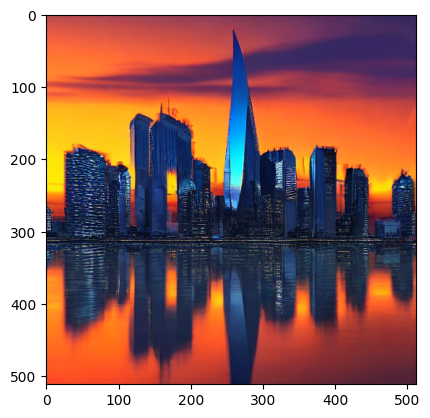

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(image)
plt.show()

### Key Principles of Prompting

Prompting is a technique used to guide AI models, such as GPT-3, towards generating desired outputs. Effective prompting involves crafting input queries or instructions in a way that maximizes the quality and relevance of the AI's responses.

#### 1. Clarity
- **Be specific and clear**: Ensure that the prompt is unambiguous and explicitly states what you want.
- **Avoid vagueness**: Vague prompts can lead to irrelevant or general responses.

#### 2. Context
- **Provide sufficient context**: Give enough background information for the AI to understand the scenario or question fully.
- **Relevant details**: Only include details that are necessary to avoid confusing the model.

#### 3. Length
- **Balance brevity and detail**: While it's essential to be concise, sometimes longer prompts with more details can yield better results.
- **Avoid overloading**: Too much information can overwhelm the model and reduce the quality of the output.

#### 4. Framing
- **Positive framing**: Frame the prompt in a way that encourages the model to provide constructive and useful responses.
- **Question format**: Sometimes phrasing the prompt as a question can help in getting more direct and relevant answers.

### Different Types of Prompting

There are several types of prompting techniques used to elicit specific types of responses from AI models. Each type serves a different purpose and can be used depending on the context and the desired outcome.

#### 1. Zero-Shot Prompting
- **Definition**: Asking the model to perform a task without providing any examples.
- **Example**: "Explain the process of photosynthesis."

#### 2. One-Shot Prompting
- **Definition**: Providing one example to help the model understand the task.
- **Example**: "Translate the following English sentence to French: 'Hello, how are you?' Example: 'Bonjour, comment ça va?' Now translate: 'Good morning.'"

#### 3. Few-Shot Prompting
- **Definition**: Providing a few examples to guide the model towards the desired response.
- **Example**: "Translate the following sentences to French: 'Hello, how are you?' - 'Bonjour, comment ça va?'; 'Good morning.' - 'Bonjour.' Now translate: 'Good night.'"

#### 4. Chain of Thought Prompting
- **Definition**: Guiding the model through a step-by-step process to reach the final answer.
- **Example**: "To solve a math problem, first identify the given data, then apply the relevant formula, and finally solve for the unknown. For example, to find the area of a circle with radius 3, use the formula A = πr²."

### Designing Effective Prompts

Effective prompts are designed by considering the principles of clarity, context, length, and framing. Here are some strategies for designing effective prompts:

#### 1. Start Simple
- **Begin with straightforward prompts**: Start with clear and simple instructions to gauge the model's understanding.
- **Build complexity gradually**: Gradually increase the complexity of the prompts as needed.

#### 2. Use Examples
- **Provide relevant examples**: Examples help the model understand the context and desired output.
- **Balance quantity**: Use enough examples to guide the model but avoid overloading it with too many.

#### 3. Refine and Iterate
- **Test and refine**: Continuously test and refine your prompts based on the model's responses.
- **Iterative improvement**: Make incremental changes to improve the clarity and effectiveness of the prompt.

#### 4. Leverage Structure
- **Use structured formats**: Use lists, bullet points, and numbered steps to make the prompt easier to follow.
- **Highlight important parts**: Use emphasis (e.g., bold, italics) to highlight key parts of the prompt.

#### 5. Be Explicit
- **Explicit instructions**: Clearly state what you expect from the model.
- **Avoid assumptions**: Do not assume the model will infer unstated requirements.

### Examples of Effective Prompts

#### Example 1: Recipe Generation
**Ineffective Prompt**: "Tell me how to make a cake."
**Effective Prompt**: "Provide a step-by-step recipe for baking a chocolate cake, including ingredients and baking instructions."

#### Example 2: Customer Support
**Ineffective Prompt**: "Explain the refund policy."
**Effective Prompt**: "Explain the refund policy for online purchases, including the time frame for returns, any conditions that must be met, and how customers can initiate a refund request."

#### Example 3: Technical Explanation
**Ineffective Prompt**: "Explain quantum computing."
**Effective Prompt**: "Explain the concept of quantum computing, including how it differs from classical computing, the principles of superposition and entanglement, and potential applications in various fields."

By following these principles and strategies, you can design prompts that effectively guide AI models to generate high-quality and relevant responses.